# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса размещения объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info() #смотрим общую информацию
data.head(10) #смотрим как таблица выглядит в целом

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


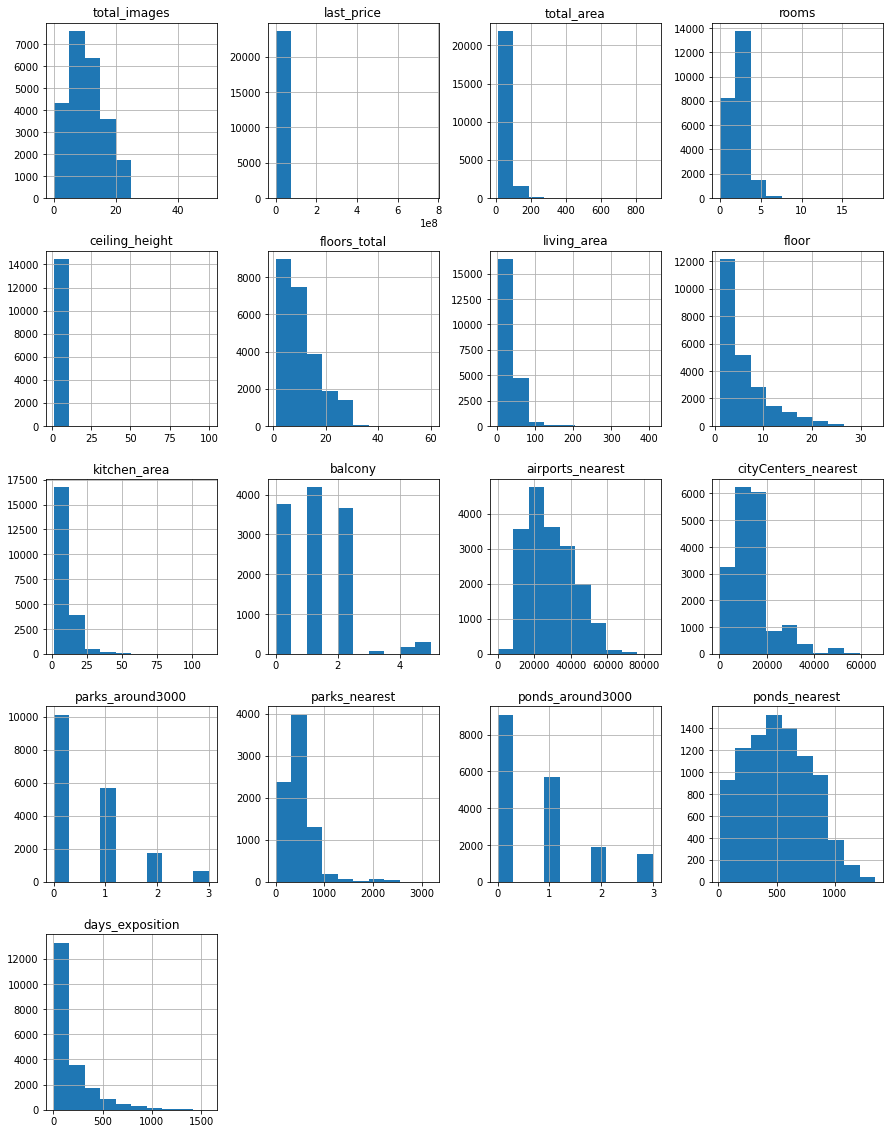

In [209]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### Пропущенные значения:

По общей информации по датасету видно, что есть пропуски в следующих столбцах:

    - ceiling_height 14504 строк заполнено
    - floors_total 23613 строк заполнено
    - living_area 21796 строк заполнено
    - is_apartment 2775 строк заполнено
    - kitchen_area 21421 строк заполнено
    - balcony 12180 строк заполнено
    - locality_name 23650 строк заполнено
    - airports_nearest 18157 строк заполнено
    - cityCenters_nearest 18180 строк заполнено
    - parks_around3000 18181 строк заполнено
    - parks_nearest 8079 строк заполнено
    - ponds_around3000 18181 строк заполнено
    - ponds_nearest 9110 строк заполнено
    - days_exposition 20518 строк заполнено

Всего строк в датасете 23699.

Посмотрим долю пропущенных значений по столбцам.

In [210]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
        .set_title('Доля пропущенных значений')    
    );    

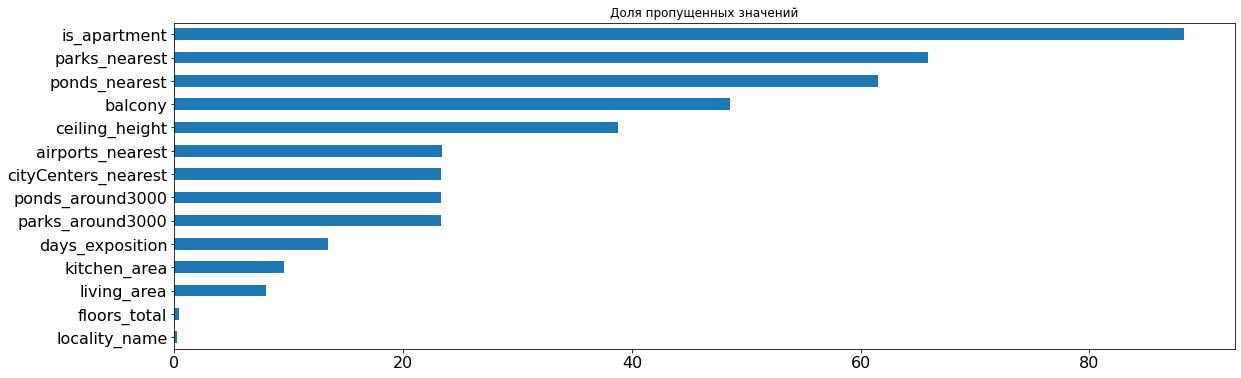

In [211]:
pass_value_barh(data)

Рассмотрим столбцы по очереди.

##### Столбец ceiling_height

В столбце ceiling_height пропущена почти половина строк. Скорее всего данная информация в объявлениях просто не заполнена продавцами. Думаю, будет адекватно заполнить их средним или медианным значением по столбцу. Посмотрим числовое описание данных по столбцу.

In [212]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данных есть сильные выбросы как вверх (100 метров больше похоже на ангар), так и вниз (с высотой потолков 1 метр особо не поживешь), поэтому стоит взять медиану.

In [213]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum() #смотрим на результат

0

##### Столбец floors_total

Здесь совсем немного пропусков, скорее всего эта информация не заполнена продавцами, либо, если она заполняется в автоматическом режиме, по соответствующим домам отсутствует информация.

Заполним пропуски нулями, чтобы сформировать срез.

In [214]:
data['floors_total'] = data['floors_total'].fillna(0)
data.query('floors_total == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,0.0,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,0.0,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,0.0,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,0.0,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,0.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,0.0,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,0.0,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,0.0,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,0.0,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,0.0,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Видно, что этажи, на которых расположена квартира совершенно разные, невозможно надежно определить, сколько этажей в здании всего, поэтому предлагаю оставить так. В дальнейшем для удобства работы со столбцом предлагаю оставить так.

In [215]:
data['floors_total'].isna().sum() #проверяем заполнение

0

##### Столбец living_area

Здесь пропусков много (около 8% от общего количества строк). Эта информация явно не заполнена продавцами.

Предлагаю заполнить пропуски медианным значением в зависимости от количества комнат.

In [216]:
for i in data['rooms'].unique(): #заменяем в цикле
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
data['living_area'].isna().sum() #проверяем заполнение

0

##### Столбец is_apartment

Здесь большинство строк. Посмотрим, что содержится в заполненных.

In [217]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Апартамены - штука редкая. Скорее всего, если информация не заполнена, значит объект апартаментами не является.

Заполним пропуски значением False.

In [218]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool') #изначально тип данных в столбце "object", нужно его поменять
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [219]:
data['is_apartment'].isna().sum() #проверяем заполнение

0

##### Столбец kitchen_area

Пропущено приличное количество значений. Возможно, отсутствие информации о площади кухни связано с определённым количетвом комнат в квартире. Проверим распределение количества пропусков в зависимости от количества комнат.

In [220]:
data.query('kitchen_area != kitchen_area').pivot_table(index='rooms', values='total_area', aggfunc='count')

,total_area
rooms,
0,197
1,834
2,654
3,434
4,99
5,41
6,8
7,7
8,3


Однозначной окрреляции нет. Заполним пропуски нулями, чтобы эти данные возможно было отсечь при анализе.

In [221]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum() #проверяем заполнение

0

##### Столбец balcony

Здесь много незаполненных значений, почти половина, но это скорее всего связано с отсутствием балконов по соответствующим объектам недвижимости. Просто заполним нулями.

In [222]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum() #проверяем заполнение

0

##### Столбец locality_name

Важный для заполнения в объявлении о продаже недвижимости параметр. Скорее всего произошла ошибка при выгрузке данных. Но так как пропущенных значений всего 49, думаю бить тревогу не стоит. Оставим так.

##### Столбец airports_nearest

Попробуем посмотреть, связано ли как-то заполнение этого столбца со столбцом населенного пункта.

In [223]:
data.groupby('locality_name')['airports_nearest'].count().sort_values()

locality_name
Бокситогорск             0
поселок Терволово        0
поселок Тельмана         0
поселок Суходолье        0
поселок Сумино           0
                     ...  
посёлок Парголово      327
Колпино                337
Пушкин                 369
посёлок Шушары         436
Санкт-Петербург      15636
Name: airports_nearest, Length: 364, dtype: int64

Судя по всему факт заполнения тесно связан с населенным пунктом и подтягивается из внешней системы, но так как при заполнении пропущенных значений нулями можно сбить информацию, заполненную намеренно, предлагаю этот столбец не трогать.

##### Столбец cityCenters_nearest

Сгруппируем по населенному пункту аналогично предыдущему столбцу

In [224]:
data.groupby('locality_name')['cityCenters_nearest'].count().sort_values()

locality_name
Бокситогорск             0
поселок Терволово        0
поселок Тельмана         0
поселок Суходолье        0
поселок Сумино           0
                     ...  
посёлок Парголово      327
Колпино                337
Пушкин                 368
посёлок Шушары         436
Санкт-Петербург      15660
Name: cityCenters_nearest, Length: 364, dtype: int64

Думаю, логика здесь аналогичная. Предлагаю этот столбец не трогать.

##### Столбец parks_nearest

Сгруппируем по населенному пункту.

In [225]:
data.groupby('locality_name')['parks_nearest'].count().sort_values()

locality_name
Бокситогорск                                0
поселок городского типа Вырица              0
поселок городского типа Большая Ижора       0
поселок Цвылёво                             0
поселок Цвелодубово                         0
                                         ... 
Кронштадт                                  87
Колпино                                   133
Петергоф                                  143
Пушкин                                    212
Санкт-Петербург                          7284
Name: parks_nearest, Length: 364, dtype: int64

Как и в столбцах "airports_nearest" и "cityCenters_nearest" предлагаю не трогать.

##### Столбец ponds_nearest

Сгруппируем по населенному пункту.

In [226]:
data.groupby('locality_name')['ponds_nearest'].count().sort_values()

locality_name
Бокситогорск              0
поселок Цвелодубово       0
поселок Ушаки             0
поселок Усть-Луга         0
поселок Углово            0
                       ... 
Сестрорецк              135
посёлок Шушары          152
Пушкин                  177
Колпино                 190
Санкт-Петербург        7983
Name: ponds_nearest, Length: 364, dtype: int64

Предлагаю не трогать.

##### Столбцы parks_around3000 и столбец ponds_around3000

Количество незаполненных строк в них подозрительно равны, возможно, выгрузки в эти столбцы идут из внешней системы и завязаны на населенный пункт.

Логично предположить, что если данные не заполнены, то количество парков или водоемов равно 0. Заполним пропуски соответствующим значением.

In [227]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum() #проверяем заполнение

0

In [228]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum() #проверяем заполнение

0

##### Столбец days_exposition

Посмотрим числовую информацию по этому столбцу.

In [229]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Учитывая, что минимальное значение по заполненным строкам - 1 день, незаполненные значения - объявления по которым квартиры ещё не проданы. Думаю, адекватно заполнить пропущенное нулями, чтобы их было просто отсечь.

In [230]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'].isna().sum() #проверяем заполнение

0

#### Изменение типов данных

In [231]:
data.info() #смотрим общую информацию по обновленной таблице
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.00,9,False,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.50,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Столбцы "last_price", "floors_total", "balcony", "days_exposition" явно содержат целые числовые значения. Переведем их в int.

Столбец "first_day_exposition" содержит дату и время публикации, его стоит перевести в datetime.

In [232]:
for t in ['last_price', 'floors_total', 'balcony', 'days_exposition']:
    data[t] = data[t].astype('int')
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info() #смотрим что получилось
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289


#### Устранение дубликатов в названии населенного пункта

In [233]:
data['locality_name'].unique() #запрашиваю список значений

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Получилось около 50 неявных повторов. Заменим.

In [234]:
data['locality_name'] = data['locality_name'].replace({
    'городской поселок Янино-1':'городской посёлок Янино-1',
    'посёлок Мурино':'Мурино',
    'поселок Мурино':'Мурино',
    'деревня Кудрово':'Кудрово',
    'поселок городского типа Красный Бор':'посёлок городского типа Красный Бор',
    'деревня Фёдоровское':'городской посёлок Фёдоровское',
    'поселок городского типа Лебяжье':'посёлок городского типа Лебяжье',
    'поселок городского типа Кузьмоловский':'посёлок городского типа Кузьмоловский',
    'поселок Аннино':'посёлок Аннино',
    'поселок Новый Свет':'посёлок Новый Свет',
    'поселок Бугры':'посёлок Бугры',
    'поселок городского типа Рощино':'городской посёлок Рощино',
    'посёлок городского типа Рощино':'городской посёлок Рощино',
    'поселок Победа':'посёлок Победа',
    'поселок Терволово':'посёлок Терволово',
    'поселок городского типа Советский':'городской посёлок Советский',
    'поселок Петровское':'посёлок Петровское',
    'поселок городского типа Токсово':'посёлок городского типа Токсово',
    'поселок городского типа Вырица':'посёлок городского типа Вырица',
    'поселок Тельмана':'посёлок Тельмана',
    'поселок городского типа Большая Ижора':'городской поселок Большая Ижора',
    'посёлок городского типа Павлово':'городской посёлок Павлово',
    'поселок городского типа Лесогорский':'городской посёлок Лесогорский',
    'поселок городского типа имени Свердлова':'посёлок городского типа имени Свердлова',
    'поселок Поляны':'посёлок Поляны',
    'посёлок городского типа Мга':'городской посёлок Мга',
    'поселок Мичуринское':'посёлок Мичуринское',
    'поселок Ильичёво':'посёлок Ильичёво',
    'поселок станции Вещево':'посёлок при железнодорожной станции Вещево',
    'поселок Гаврилово':'посёлок Гаврилово',
    'поселок городского типа Назия':'городской посёлок Назия',
    'поселок Старая Малукса':'посёлок Старая Малукса',
    'поселок Гарболово':'деревня Гарболово',
    'поселок станции Приветнинское':'посёлок при железнодорожной станции Приветнинское',
    'поселок Мельниково':'посёлок Мельниково',
    'поселок Усть-Луга': 'посёлок Усть-Луга',
    'поселок городского типа Рябово':'посёлок городского типа Рябово',
    'поселок Стеклянный':'посёлок Стеклянный',
    'поселок городского типа Форносово':'посёлок городского типа Форносово',
    'поселок Сумино':'посёлок Сумино',
    'поселок Возрождение':'посёлок Возрождение',
    'поселок Лисий Нос':'посёлок Лисий Нос',
    'поселок Жилгородок':'посёлок Жилгородок',
    'поселок Коробицыно':'посёлок Коробицыно',
    'поселок Кобралово':'посёлок Кобралово',
    'поселок Перово':'посёлок Перово',
    'поселок Пансионат Зелёный Бор':'посёлок Пансионат Зелёный Бор'
})
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'городской посёлок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сл

 Замена успешна.

#### Устранение редких и выбивающихся значений

Посмотрим, как изменились гистограммы после заполнения пропусков

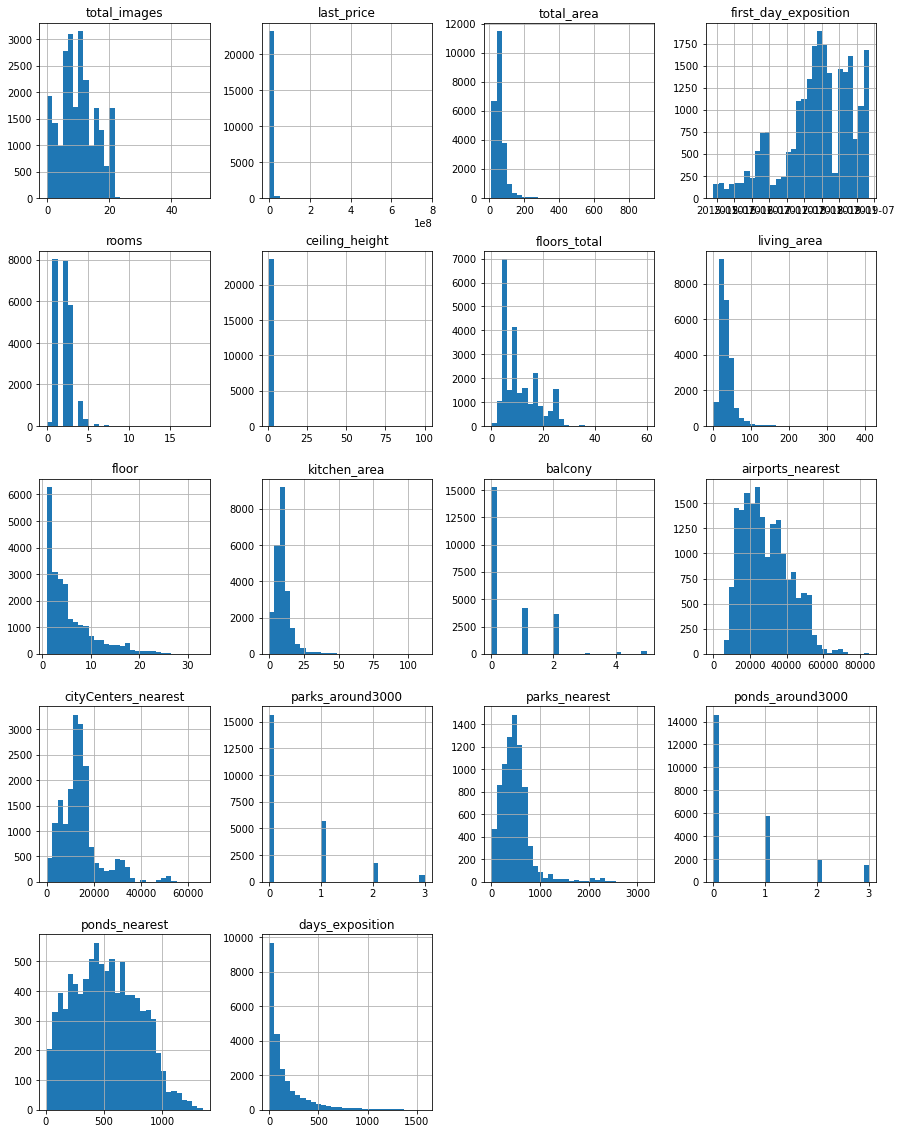

In [235]:
data.hist(figsize=(15, 20), bins=30)
plt.show()

Видно, что по столбцам "total_images", "last_price", "total_area", "rooms", "ceiling_height", "floors_total", "living_area", "floor", "kitchen_area", "days_exposition" есть выбивающиеся значения. Рассмотрим их по очереди.

##### Столбец total_images

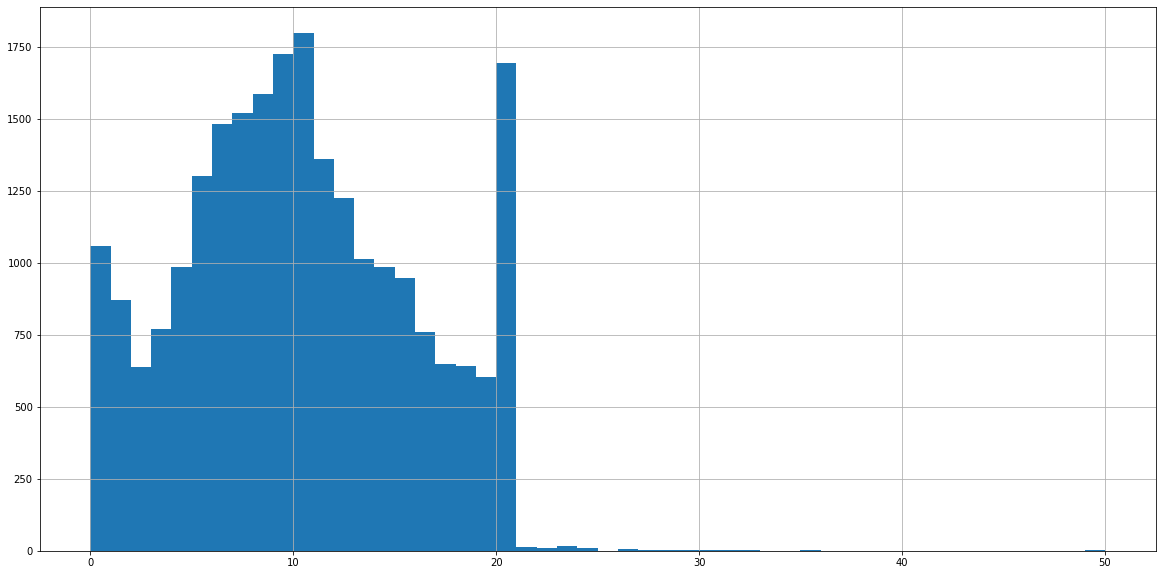

In [236]:
data['total_images'].hist(figsize=(20,10), bins=50)
plt.show()

Видно, что чаще всего продавцы загружают от 6 до 12 фотографий, либо 20 (скорее всего рекомендованной сайтом значение), довольно много не загружают их вообще. При этом больше 20 фото загружают единицы. Думаю, такое отклонение связано скорее со старательностью отдельных продавцов, нежели с ошибкой в данных. Не вижу оснований отсекать эти строки.

##### Столбец last_price

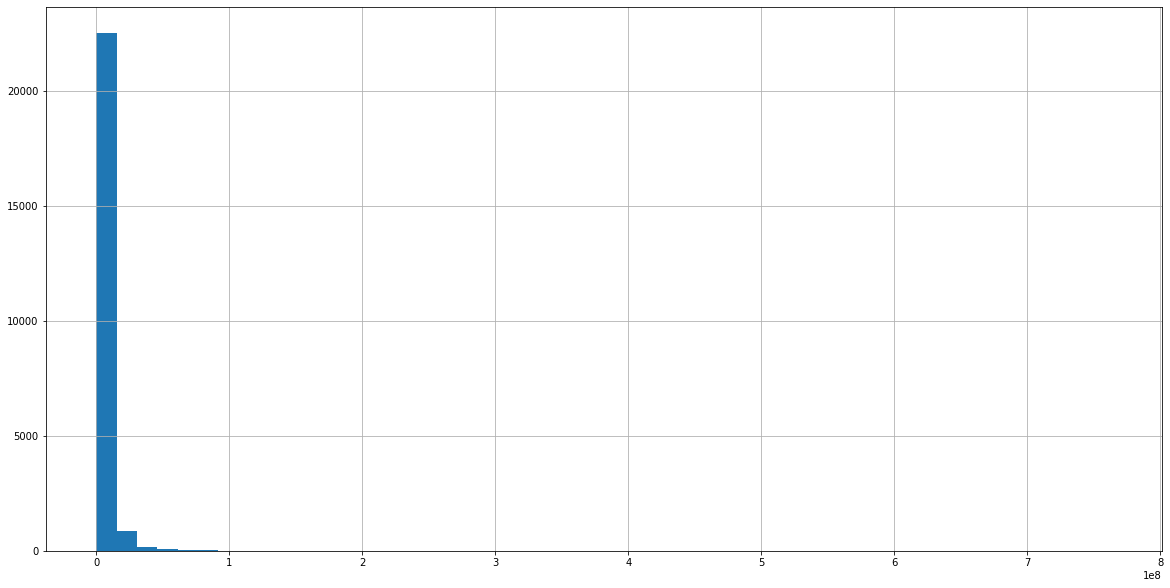

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [237]:
data['last_price'].hist(figsize=(20,10), bins=50)
plt.show()
data['last_price'].describe()

Максимальное значение в 763 млн. утягивает гистограмму вправо, видно, что объявлений с ценой более 100 млн. практически нет. Попробуем их отбросить.

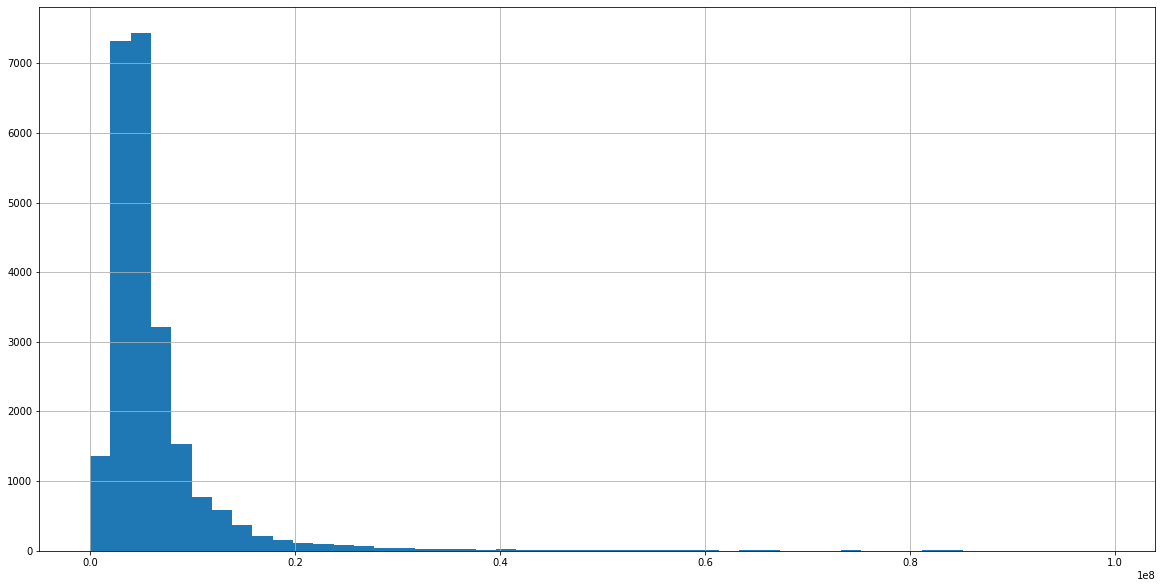

In [238]:
data.query('last_price <= 100000000')['last_price'].hist(figsize=(20,10), bins=50)
plt.show()

Стало видно, что больше всего объявлений подано с ценой от 2 до 6 млн., а после 16 млн. их число очень плавно стремится к нулю. Посмотрим на диаграмму размаха.

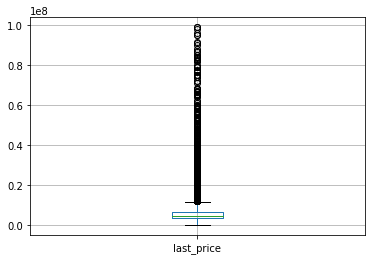

In [239]:
data.query('last_price <= 100000000').boxplot(column='last_price')
plt.show()

В целом верно, в районе 16 млн. располагается граница 1,5IQR, все что выше стоит исключить.

In [240]:
data.query('last_price <= 16000000')['last_price'].describe()

count    2.263400e+04
mean     5.225856e+06
std      2.828438e+06
min      1.219000e+04
25%      3.390000e+06
50%      4.500000e+06
75%      6.350000e+06
max      1.600000e+07
Name: last_price, dtype: float64

И данных будет потеряно немного, всего около 1000 строк.

##### Столбец total_area

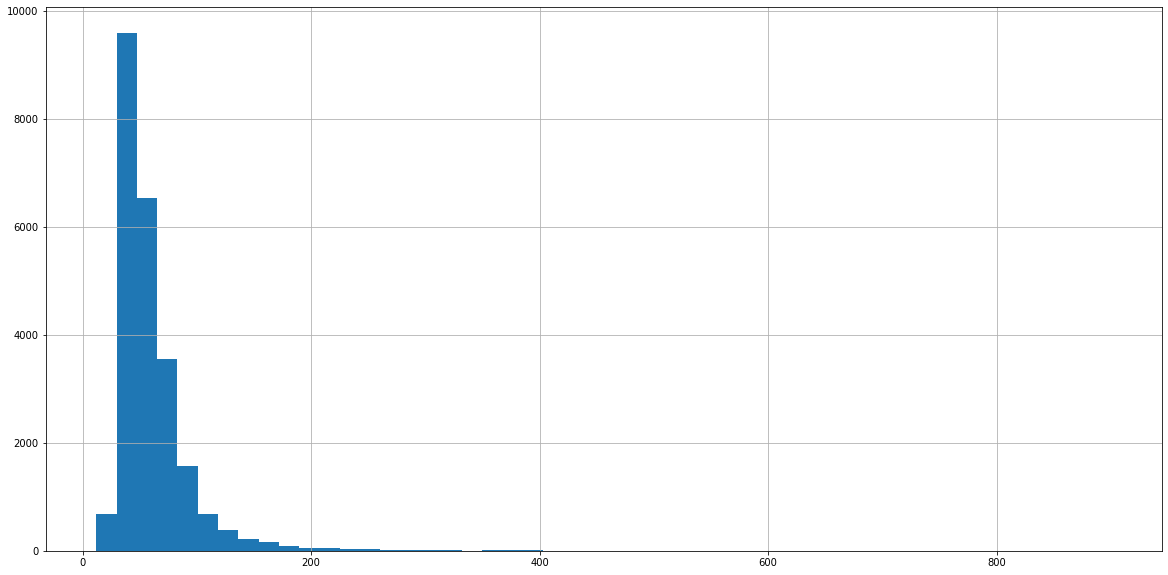

In [241]:
data['total_area'].hist(figsize=(20,10), bins=50)
plt.show()

Больше всего объявлений подано с площадью квартиры около 50 квадратных метров, после 100 идет довольно резкий спад, после 200 объявлений практически нет. Отсечем эти квартиры и построим диаграмму размаха.

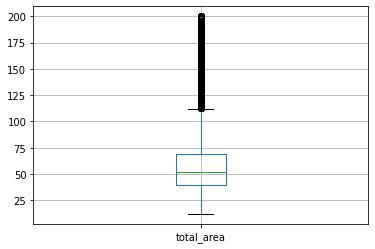

In [242]:
data.query('total_area <= 200').boxplot(column='total_area')
plt.show()

Верхняя граница 1,5IQR располагается в районе 110-115 квадратных метров, думаю, строки с площадью больше 115 стоит отсечь.

In [243]:
data.query('total_area <= 115')['total_area'].describe()

count    22482.000000
mean        54.426912
std         19.472051
min         12.000000
25%         39.400000
50%         50.200000
75%         65.700000
max        115.000000
Name: total_area, dtype: float64

Исключается около 1200 строк, что приемлемо.

##### Столбец rooms

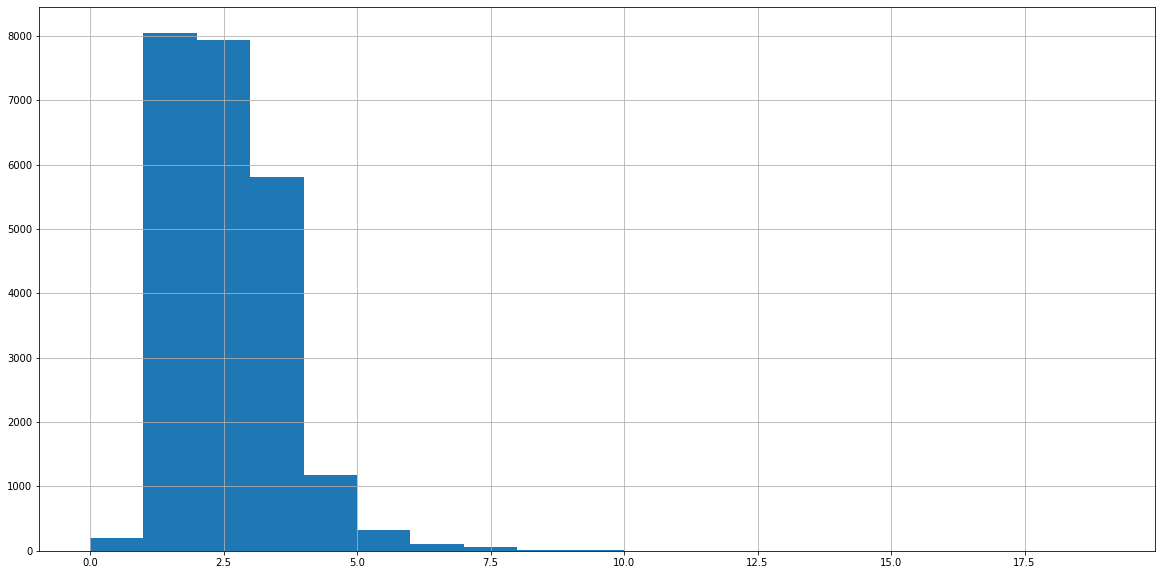

In [244]:
data['rooms'].hist(figsize=(20,10), bins=19)
plt.show()

Видно, что подавляющее большинство квартир - одна и двухкомнатные, совсем немного квартир на комнаты не поделены, а больше 5 комнат встречается редко. Посмотрим диаграмму размаха.

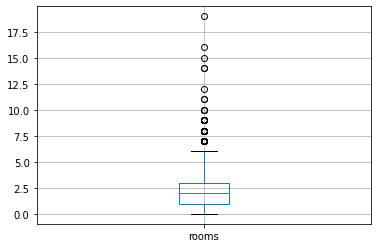

In [245]:
data.boxplot(column='rooms')
plt.show()

Верхняя граница 1,5IQR располагается в районе 6 комнат, все, что выше, отсечем.

In [246]:
data.query('rooms <= 6')['rooms'].describe()

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Ушло всего 90 строк.

##### Столбец ceiling_height

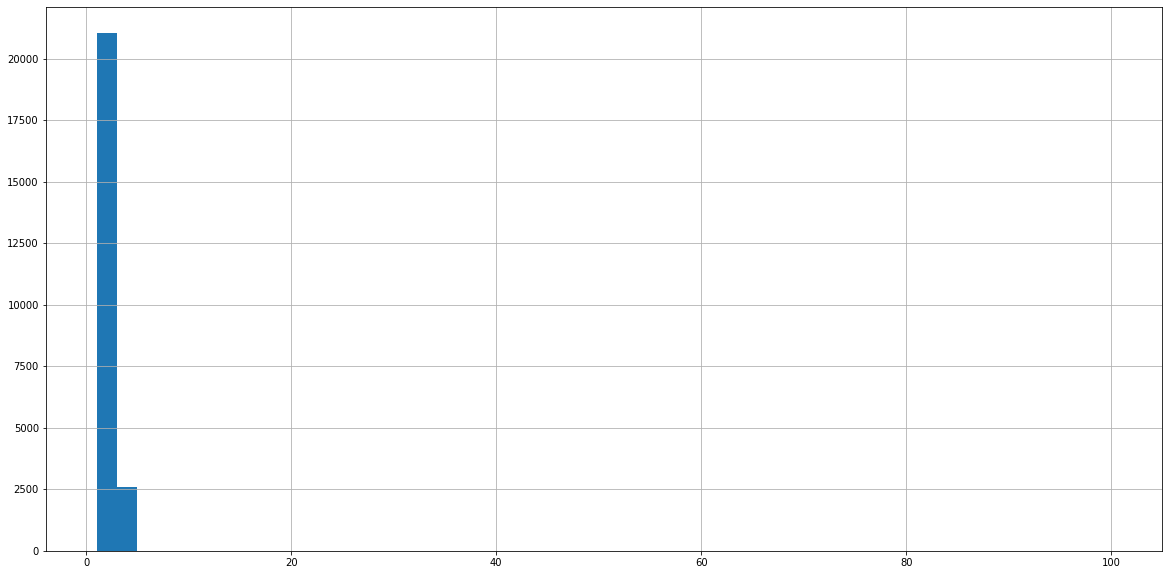

In [247]:
data['ceiling_height'].hist(figsize=(20,10), bins=50)
plt.show()

Квартир с высотой потолков более 5 метров практически нет. Осечем их.

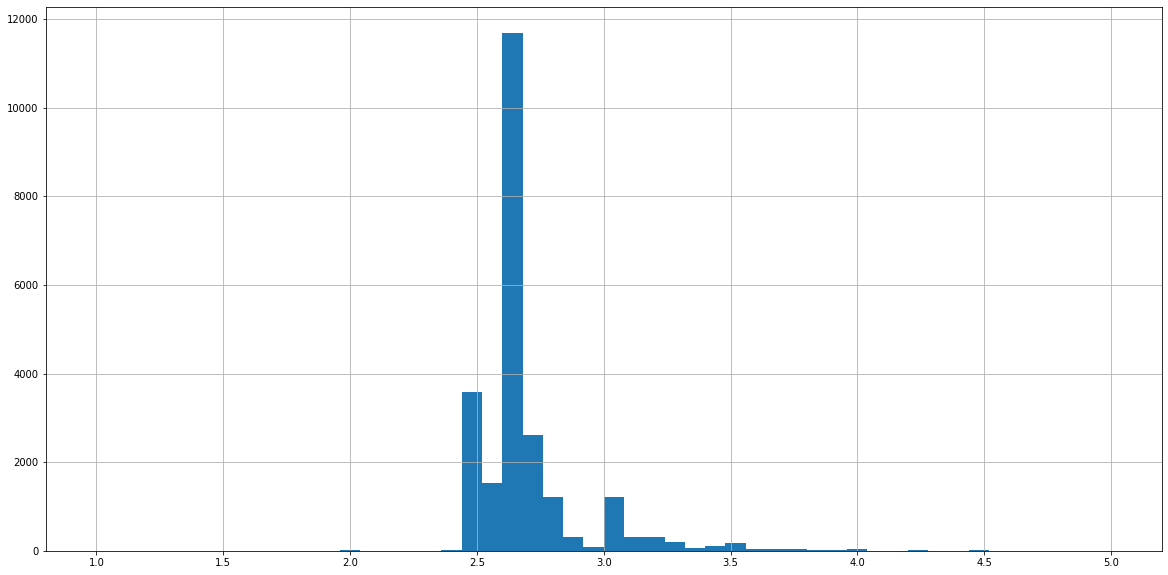

In [248]:
data.query('ceiling_height <= 5')['ceiling_height'].hist(figsize=(20,10), bins=50)
plt.show()

Становится видно, что в выборке также есть квартиры с высотой потолков менее 2 метров, это очевидная ошибка, в таких квартирах невозможно жить, отсечем и их.

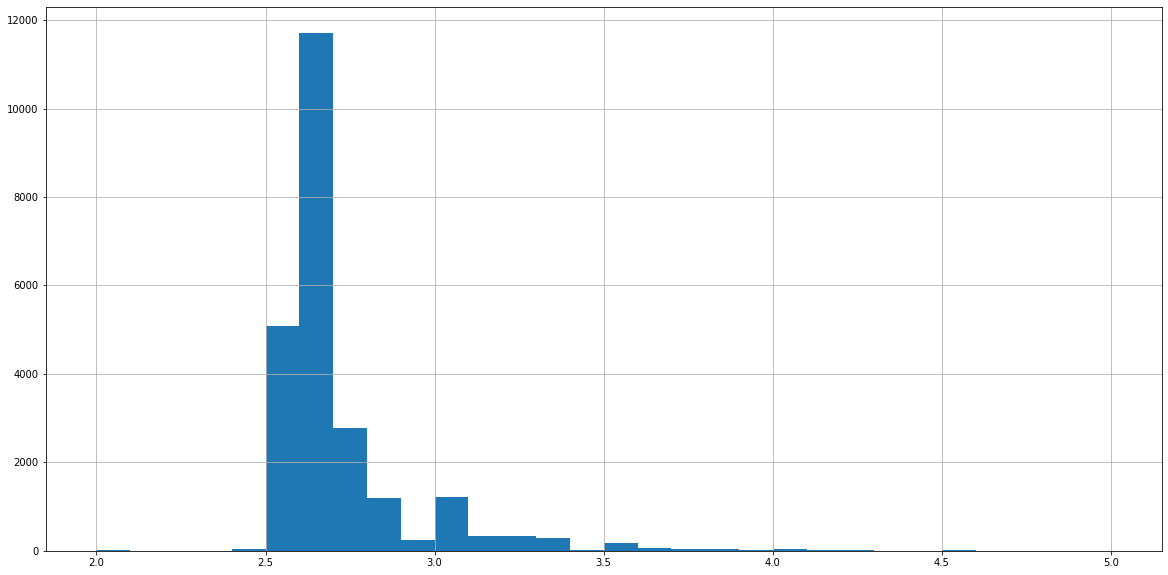

In [249]:
data.query('2 <= ceiling_height <= 5')['ceiling_height'].hist(figsize=(20,10), bins=30)
plt.show()

Большинство квартир имеют высоту потолков от 2,5 до 2,7 метров. После 3,1 значений мало, также как и менее 2,5. Построим диаграмму размаха.

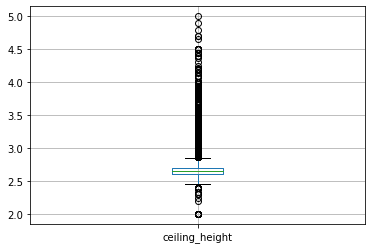

In [250]:
data.query('2 <= ceiling_height <= 5').boxplot(column='ceiling_height')
plt.show()

Нижняя граница 1,5IQR как раз в районе 2,5 метров, а верхняя в районе 2,8 метров, но я считаю, что в данном случае стоит отсечь значения выше 3,1, поскольку это сохранит около 1000 записей.

In [251]:
data.query('2.5 <= ceiling_height <= 3.1')['ceiling_height'].describe()

count    22410.000000
mean         2.659361
std          0.125992
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.100000
Name: ceiling_height, dtype: float64

Исключено 1500 записей. Приемлемо.

##### Столбец floors_total

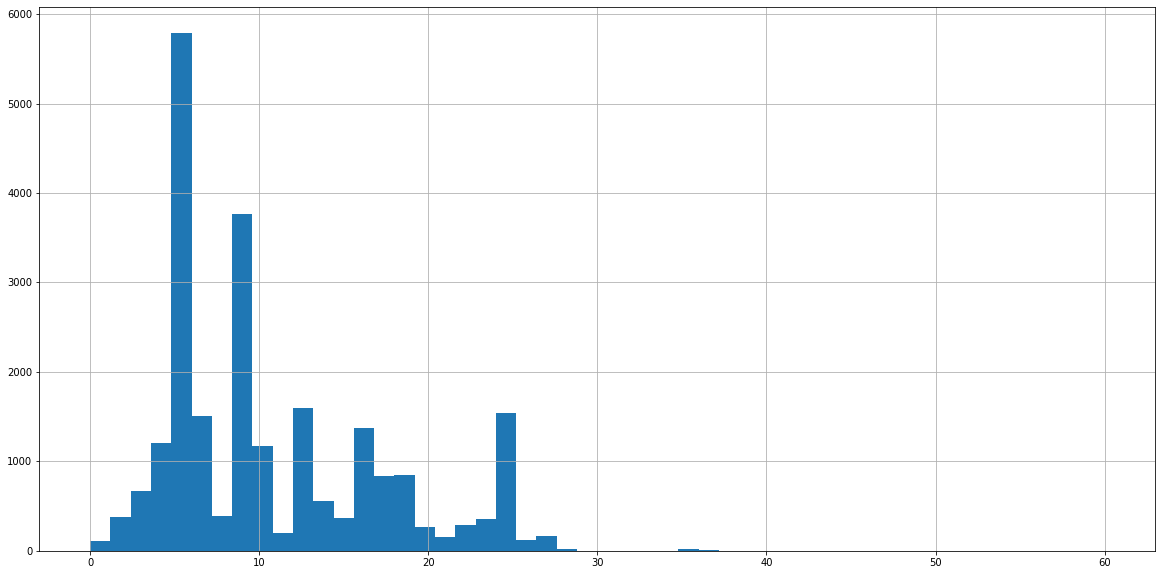

In [252]:
data['floors_total'].hist(figsize=(20,10), bins=50)
plt.show()

Значения в 0 этаже добавлено нами, его стоит отсечь. Также отсечем все значения больше 30 - их практически нет.

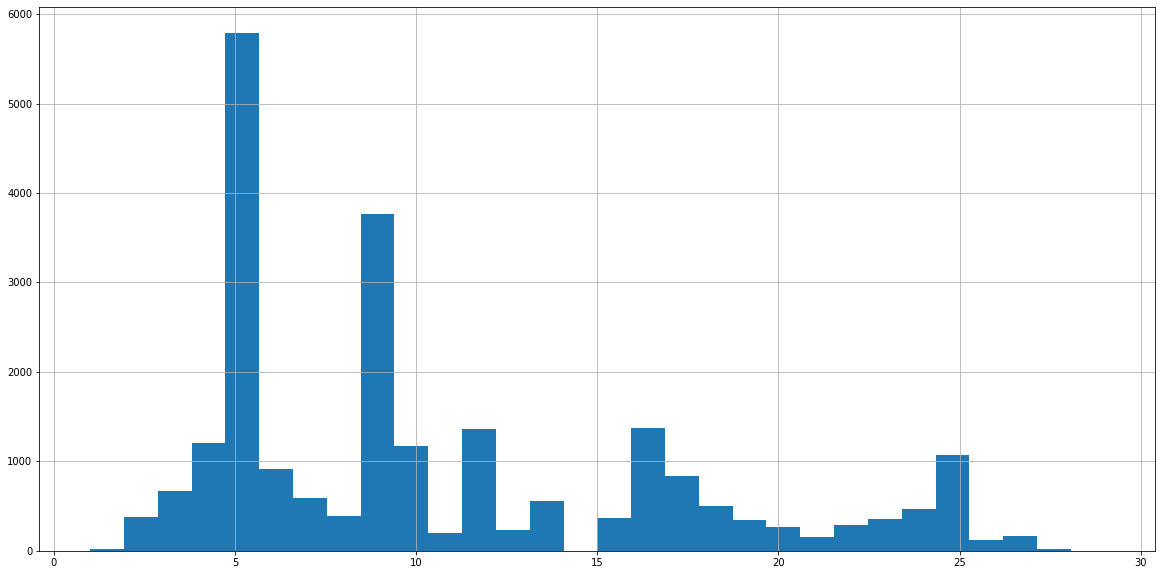

In [253]:
data.query('1 <= floors_total <= 30')['floors_total'].hist(figsize=(20,10), bins=30)
plt.show()

Больше всего в выборке пятиэтажек и девятиэтажек. 10, 12, 16 и 25 этажей встречается одинаково часто. Частных одноэтажных домов почти нет. Построим диаграмму размаха.

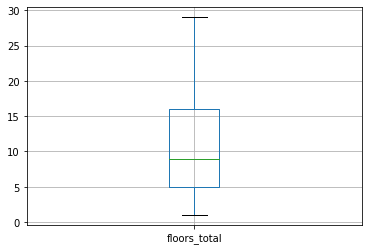

In [254]:
data.query('1 <= floors_total <= 30').boxplot(column='floors_total')
plt.show()

Вся выборка находится в границах 1,5IQR, оставим так.

In [255]:
data.query('1 <= floors_total <= 30')['floors_total'].describe()

count    23581.000000
mean        10.638947
std          6.530499
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

Исключено около 400 строк.

##### Столбец living_area

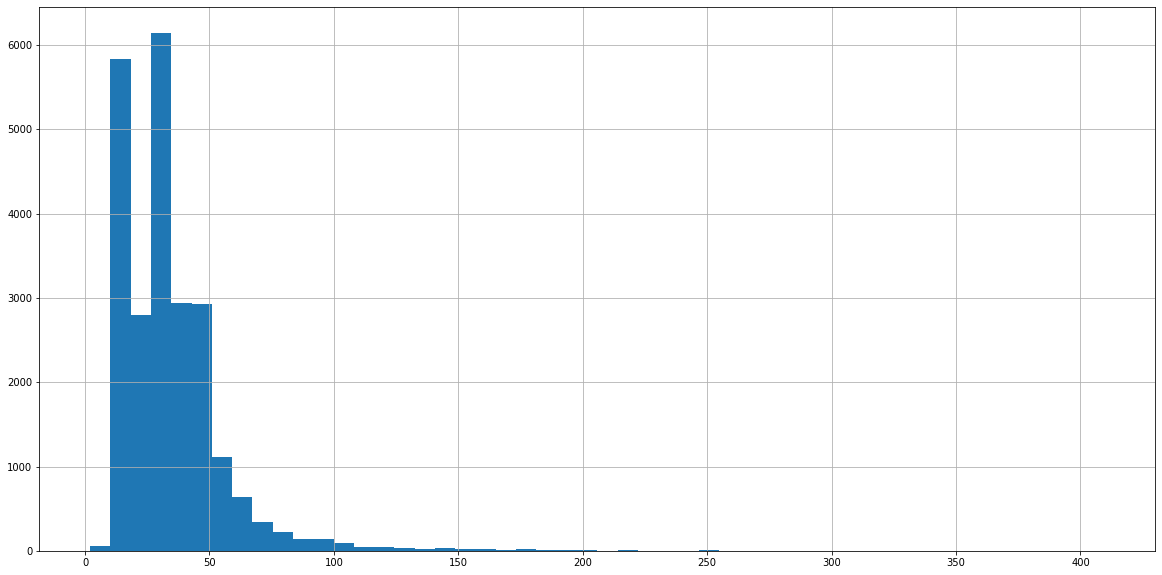

In [256]:
data['living_area'].hist(figsize=(20,10), bins=50)
plt.show()

Очень мало значений более 150 квадратов. Отсечем их.

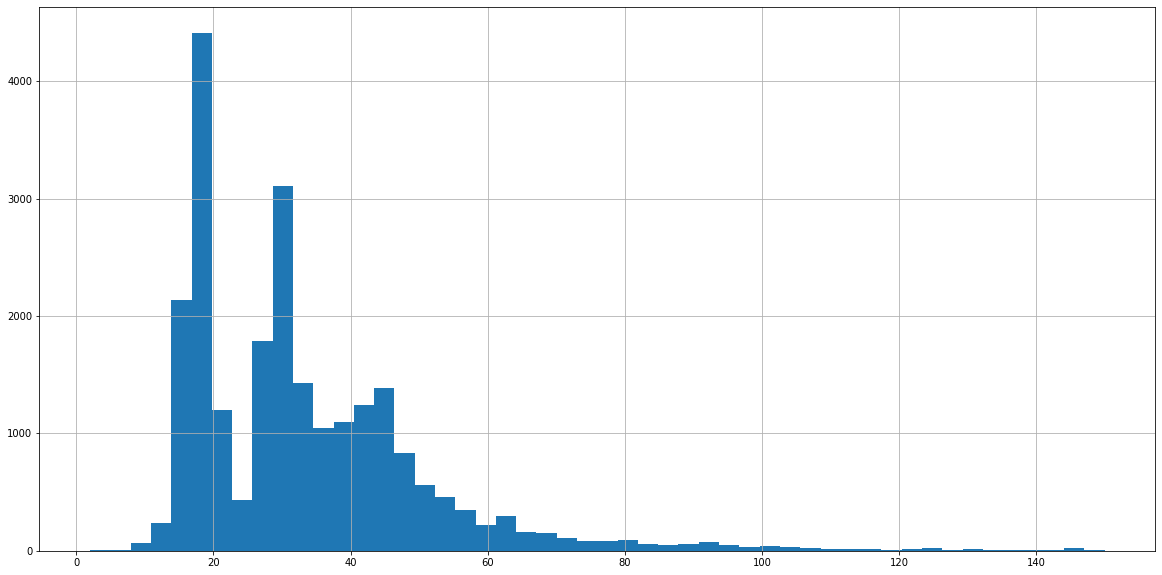

In [257]:
data.query('living_area <= 150')['living_area'].hist(figsize=(20,10), bins=50)
plt.show()

Больше всего квартир с жилой площадью около 20 и 30 квадратных метров. Меньше 15 и больше 65 встречаются редко.

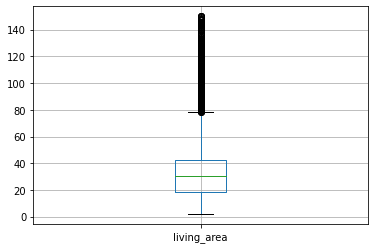

In [258]:
data.query('living_area <= 150').boxplot(column='living_area')
plt.show()

Верхняя граница 1,5IQR в районе 80, отсечем по ней.

In [259]:
data.query('living_area <= 80')['living_area'].describe()

count    22966.000000
mean        31.683789
std         14.135352
min          2.000000
25%         18.100000
50%         30.000000
75%         41.300000
max         80.000000
Name: living_area, dtype: float64

Исключено около 1000 записей.

##### Столбец floor

Так как мы ограничили столбец floor_total значением 30, и в этом столбце сразу отсечем эти значения.

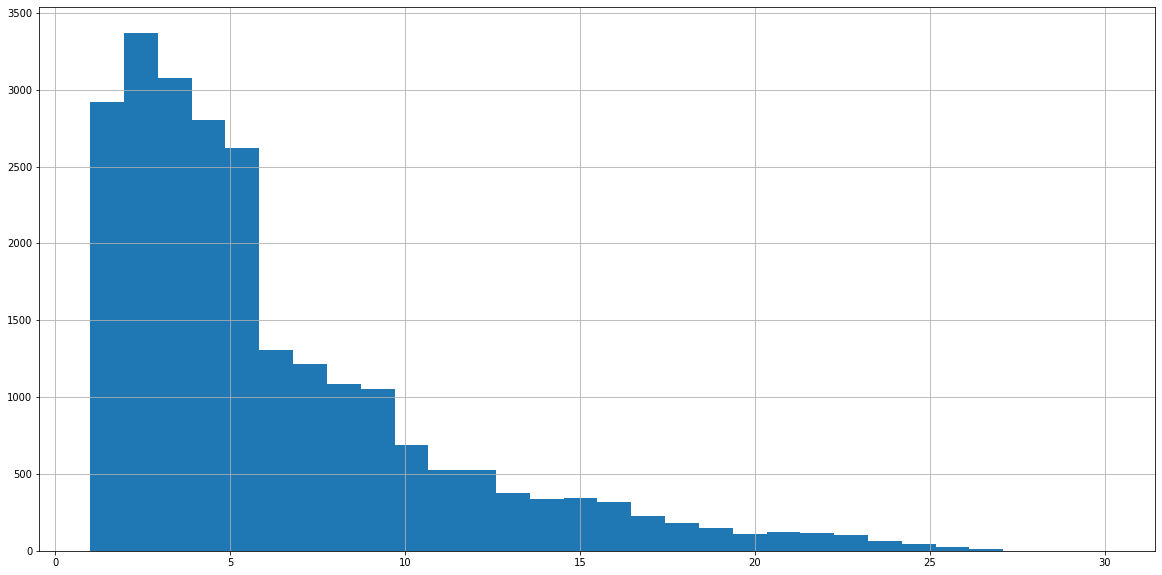

In [260]:
data.query('floor <= 30')['floor'].hist(figsize=(20,10), bins=30)
plt.show()

Большинство квартир располагаются на первых пяти этажах. Выше 20 уже очень мало объявлений. В целом предлагаю оставить ограничение верхней границы тождественным столбцу floors_total.

##### Столбец kitchen_area

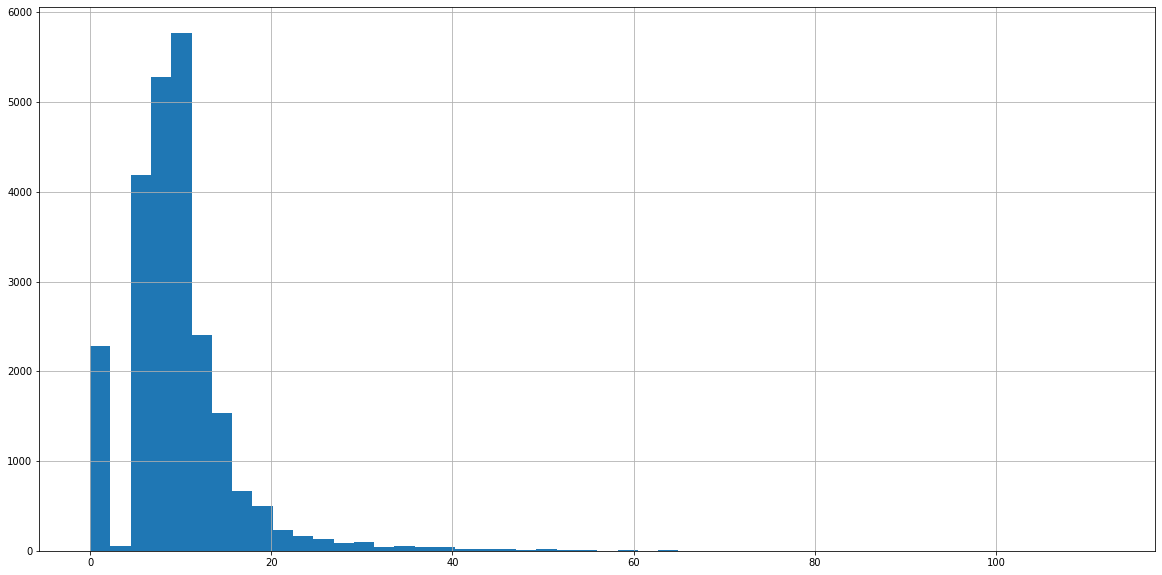

In [261]:
data['kitchen_area'].hist(figsize=(20,10), bins=50)
plt.show()

В основном в объявлениях фигурирует площадь кухни от 5 до 10 квадратных метров. Также довольно много объявлений с отметкой 0 - в них отметки о кухне не было вообще. Кухни более 30 квадратов встречаются редко.

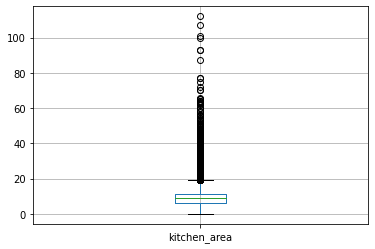

In [262]:
data.boxplot(column='kitchen_area')
plt.show()

Верхняя граница 1,5IQR находится на 20, но с учетом большого количества нулей и данных с гистограммы, предлагаю ограничить выборку сверху 25 квадратными метрами.

In [263]:
data.query('kitchen_area <= 25')['kitchen_area'].describe()

count    23147.000000
mean         8.917460
std          4.634925
min          0.000000
25%          6.300000
50%          8.700000
75%         11.000000
max         25.000000
Name: kitchen_area, dtype: float64

Исключено около 800 строк.

##### Столбец days_exposition

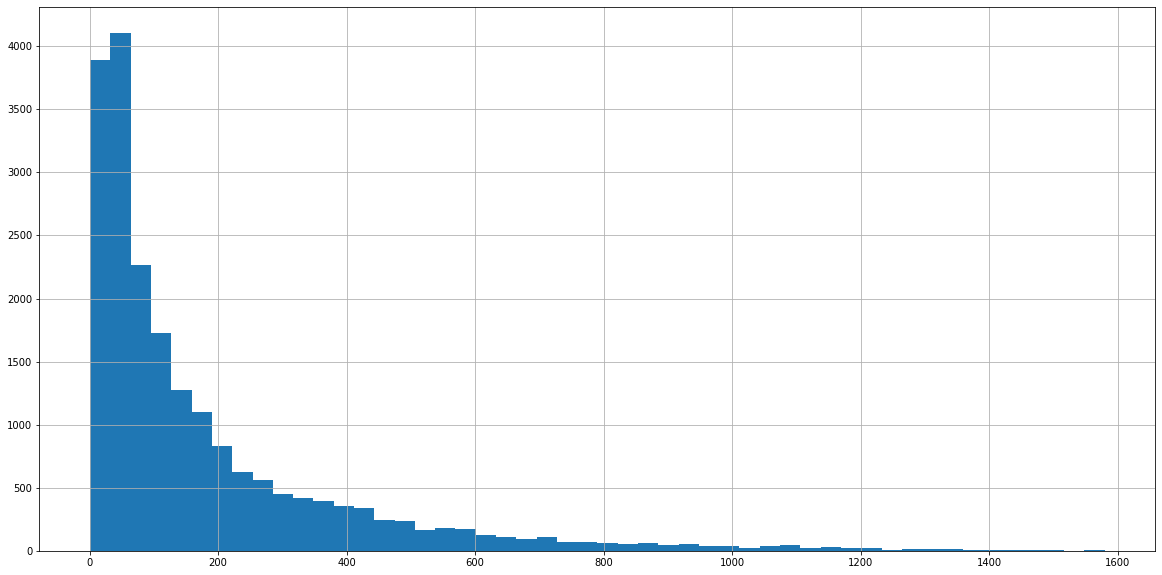

In [264]:
data.query('days_exposition > 0')['days_exposition'].hist(figsize=(20,10), bins=50)
plt.show()

Из графика видно, что большинство квартир продается в первые дни после размещения, далее кривая мягко сходит на нет. В целом, для полноты статистики, из этого столбца исключать данные не хочется.

##### Итоговая корректировка

Остается только составить новый датафрейм с учетом вышеизложенного. Также отбросим строки без указания населенного пункта.

In [265]:
data_filtered = data.query('(last_price <= 16000000) and \
                           (total_area <= 115) and \
                           (rooms <= 6) and \
                           (2.5 <= ceiling_height <= 3.1) and \
                           (1 <= floors_total <= 30) and \
                           (living_area <= 80) and \
                           (floor <= 30) and \
                           (kitchen_area <= 25) and \
                           (locality_name == locality_name)').reset_index()
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975 entries, 0 to 20974
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 20975 non-null  int64         
 1   total_images          20975 non-null  int64         
 2   last_price            20975 non-null  int64         
 3   total_area            20975 non-null  float64       
 4   first_day_exposition  20975 non-null  datetime64[ns]
 5   rooms                 20975 non-null  int64         
 6   ceiling_height        20975 non-null  float64       
 7   floors_total          20975 non-null  int64         
 8   living_area           20975 non-null  float64       
 9   floor                 20975 non-null  int64         
 10  is_apartment          20975 non-null  bool          
 11  studio                20975 non-null  bool          
 12  open_plan             20975 non-null  bool          
 13  kitchen_area    

Около 2700 записей удалено. Считаю приемлемо.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [266]:
#простое вычисление - цена на общую площадь
#перевожу в целое цисло для удобства, заодно отбрасываю копейки, они большой роли не сыграют.
data_filtered['sq_meter_price'] = (data_filtered['last_price'] / data_filtered['total_area']).astype('int')
#проверяю что все красиво
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55,95065
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189,87454
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75000


#### День недели публикации

In [267]:
data_filtered['weekday_exposition'] = data_filtered['first_day_exposition'].dt.weekday
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,3
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55,95065,0
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195,3
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544,3
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189,87454,2
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524,6
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525,3
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75000,0


#### Месяц публикации

In [268]:
data_filtered['month_exposition'] = data_filtered['first_day_exposition'].dt.month
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,NaN,NaN,0.0,NaN,0.0,NaN,55,95065,0,9
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195,3,11
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544,3,4
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,NaN,NaN,0.0,NaN,0.0,NaN,189,87454,2,5
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524,6,2
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525,3,11
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75000,0,8


#### Год публикации

In [269]:
data_filtered['year_exposition'] = data_filtered['first_day_exposition'].dt.year
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,NaN,0.0,NaN,0.0,NaN,55,95065,0,9,2018
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,19143.0,0.0,NaN,0.0,NaN,155,99195,3,11,2017
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,11634.0,0.0,NaN,0.0,NaN,0,110544,3,4,2019
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,NaN,0.0,NaN,0.0,NaN,189,87454,2,5,2018
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,15008.0,0.0,NaN,0.0,NaN,289,88524,6,2,2017
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,13878.0,1.0,310.0,2.0,553.0,137,127525,3,11,2017
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,51677.0,0.0,NaN,0.0,NaN,7,75000,0,8,2018


#### Тип этажа квартиры

In [270]:
#для определения типа этажа напишем функцию
def floor_categoryse(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data_filtered['floor_category'] = data_filtered[['floor', 'floors_total']].apply(floor_categoryse, axis=1)
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,1.0,482.0,2.0,755.0,0,120370,3,3,2019,Другой
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,Первый
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,Другой
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,0.0,NaN,0.0,NaN,55,95065,0,9,2018,Другой
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,0.0,NaN,0.0,NaN,155,99195,3,11,2017,Другой
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,0.0,NaN,0.0,NaN,0,110544,3,4,2019,Другой
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,0.0,NaN,0.0,NaN,189,87454,2,5,2018,Другой
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,0.0,NaN,0.0,NaN,289,88524,6,2,2017,Другой
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,1.0,310.0,2.0,553.0,137,127525,3,11,2017,Другой
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,0.0,NaN,0.0,NaN,7,75000,0,8,2018,Другой


####  Расстояние до центра города в километрах

In [271]:
data_filtered['city_centers_km'] = round(data_filtered['cityCenters_nearest'] / 1000, 0)
data_filtered.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,482.0,2.0,755.0,0,120370,3,3,2019,Другой,16.0
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,...,NaN,0.0,NaN,81,82920,1,12,2018,Первый,19.0
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,90.0,2.0,574.0,558,92785,3,8,2015,Другой,14.0
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,...,NaN,0.0,NaN,55,95065,0,9,2018,Другой,NaN
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,...,NaN,0.0,NaN,155,99195,3,11,2017,Другой,19.0
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,...,NaN,0.0,NaN,0,110544,3,4,2019,Другой,12.0
6,8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,...,NaN,0.0,NaN,189,87454,2,5,2018,Другой,NaN
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,NaN,0.0,NaN,289,88524,6,2,2017,Другой,15.0
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,310.0,2.0,553.0,137,127525,3,11,2017,Другой,14.0
9,11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,...,NaN,0.0,NaN,7,75000,0,8,2018,Другой,52.0


### Проведите исследовательский анализ данных

#### Изучение отдельных параметров объектов

##### Общая площадь

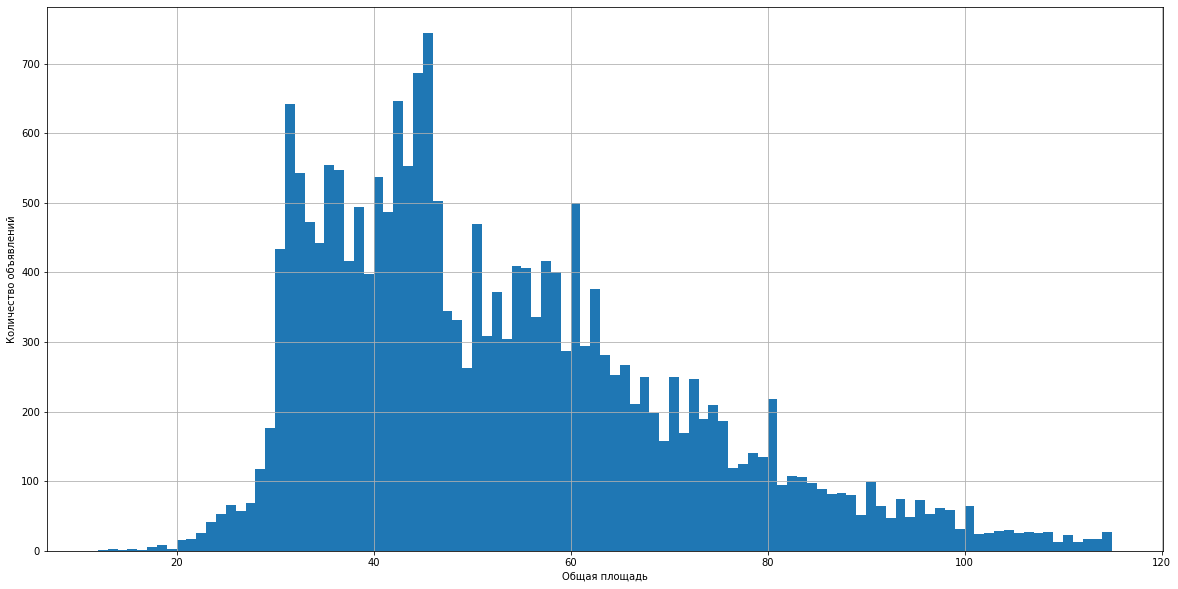

In [272]:
data_filtered['total_area'].hist(figsize=(20,10), bins=103)
plt.xlabel("Общая площадь")
plt.ylabel("Количество объявлений")
plt.show()

В большей части объявлений общая площадь квартир указана от 30 до 60 кв. метров. Очень мало объявлений с квадратурой меньше 30. Больше всего объявлений по квартирам с площадью 45 кв. метра, дальше с увеличением площади, количество объявлений постепеннь снижается, с небольшими всплесками на круглых значениях (50, 60, 70 и т.д.).

##### Жилая площадь

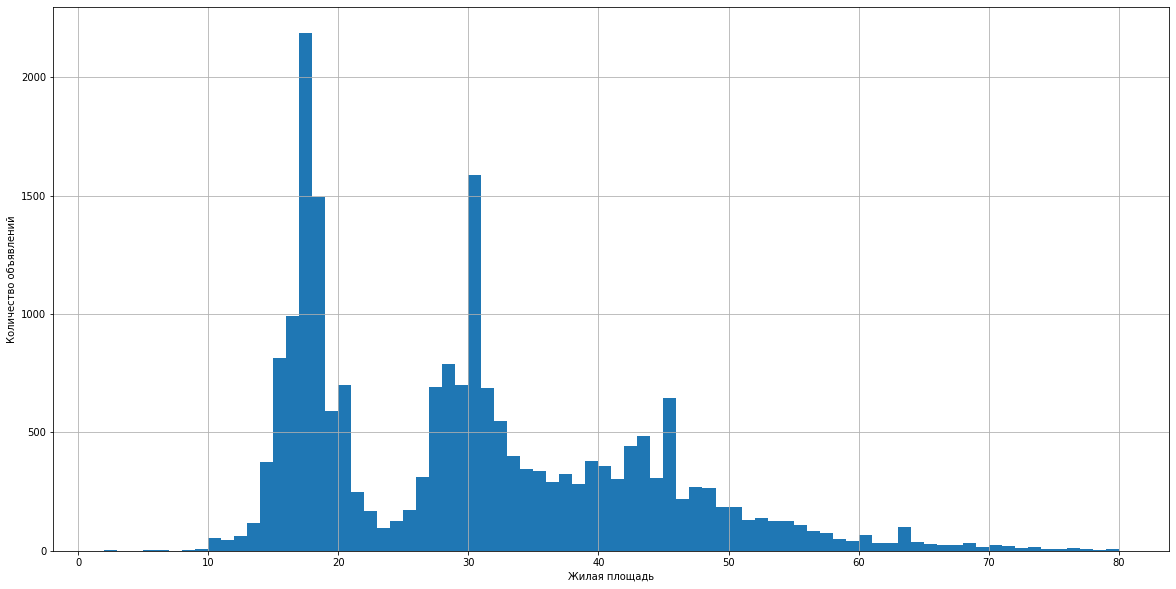

In [273]:
data_filtered['living_area'].hist(figsize=(20,10), bins=78)
plt.xlabel("Жилая площадь")
plt.ylabel("Количество объявлений")
plt.show()

Видны резкие пики в количестве объявлений с жилой площадью 17 и 30 кв. метров. Очень мало объявлений с жилой площадью менее 14 кв. метров и в промежутке от 21 до 26 кв. метров. После значения 30 график идет на спад, но из него немного выделяется участок от 39 до 45 кв. метров. Этих объявлений немного больше.

##### Площадь кухни

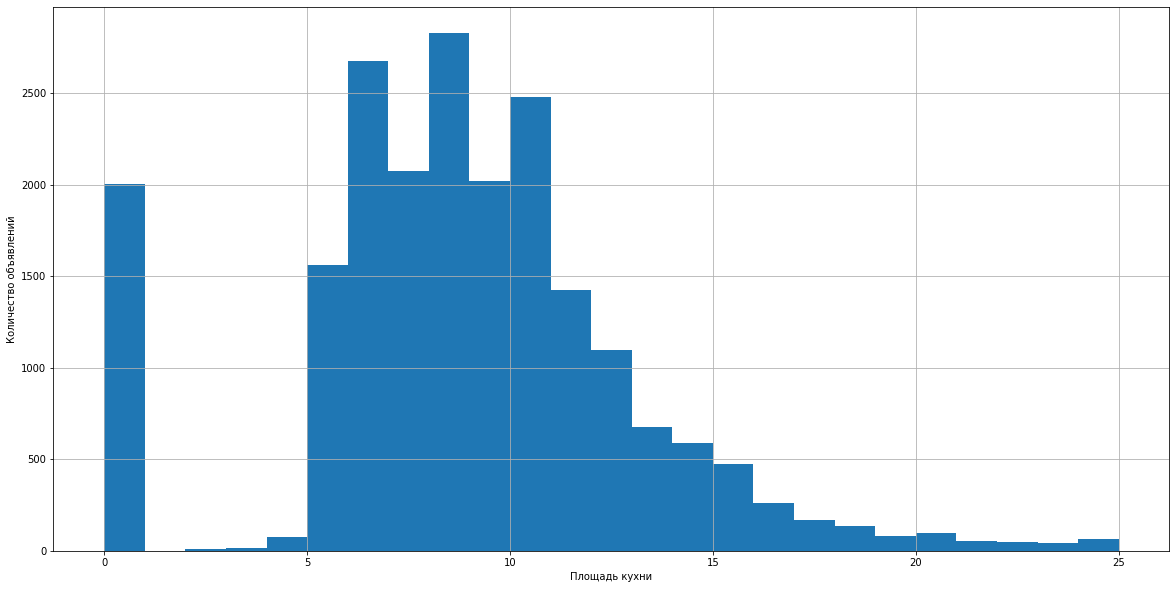

In [274]:
data_filtered['kitchen_area'].hist(figsize=(20,10), bins=25)
plt.xlabel("Площадь кухни")
plt.ylabel("Количество объявлений")
plt.show()

Довольно большое число объявлений (почти 10% от выборки) не имеет информации о наличии кухни. При этом, если кухня есть, то в большинстве объявлений ее размер находится между 5 и 12 кв. метрами. Объявлений с кухнями от 1 до 4 метров почти нет. После 12 количество объявлений постепенно спадает без выраженных пиков.

##### Цена объекта

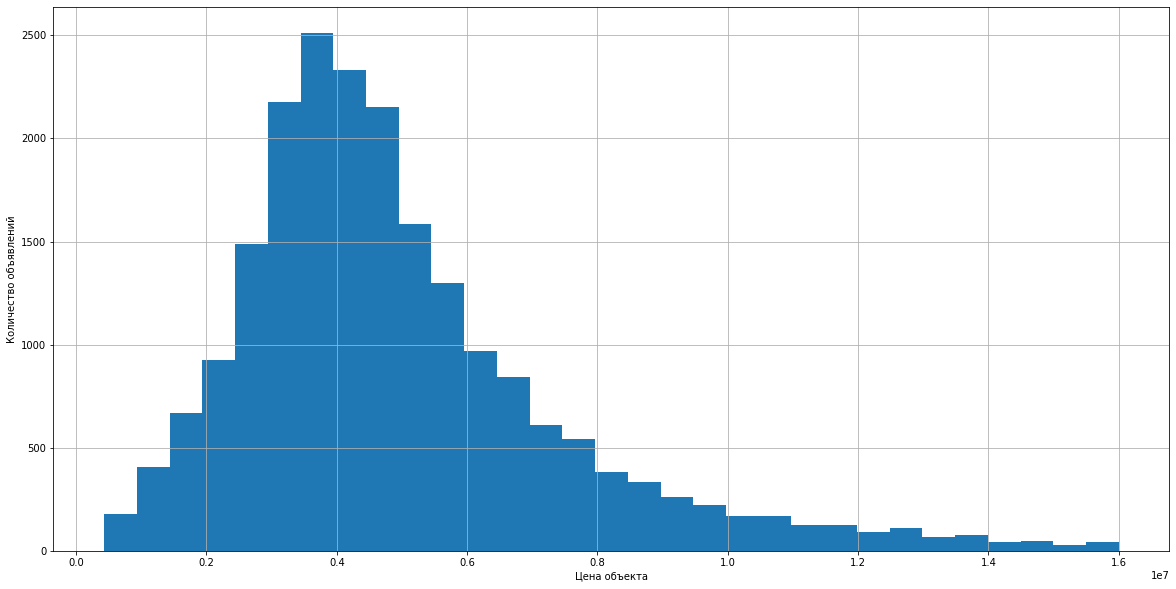

In [275]:
data_filtered['last_price'].hist(figsize=(20,10), bins=31)
plt.xlabel("Цена объекта")
plt.ylabel("Количество объявлений")
plt.show()

На графике заметен явный пик на участке от 3,5 до 4 млн. рублей, остальной график равномерно поднимается до него и равномерно спадает после. Немногим больше половины объявлений располагается в промежутке от 2,5 до 5,5 млн. рублей. До 1,5 млн. и после 8 млн. объявлений не очень много.

##### Количество комнат

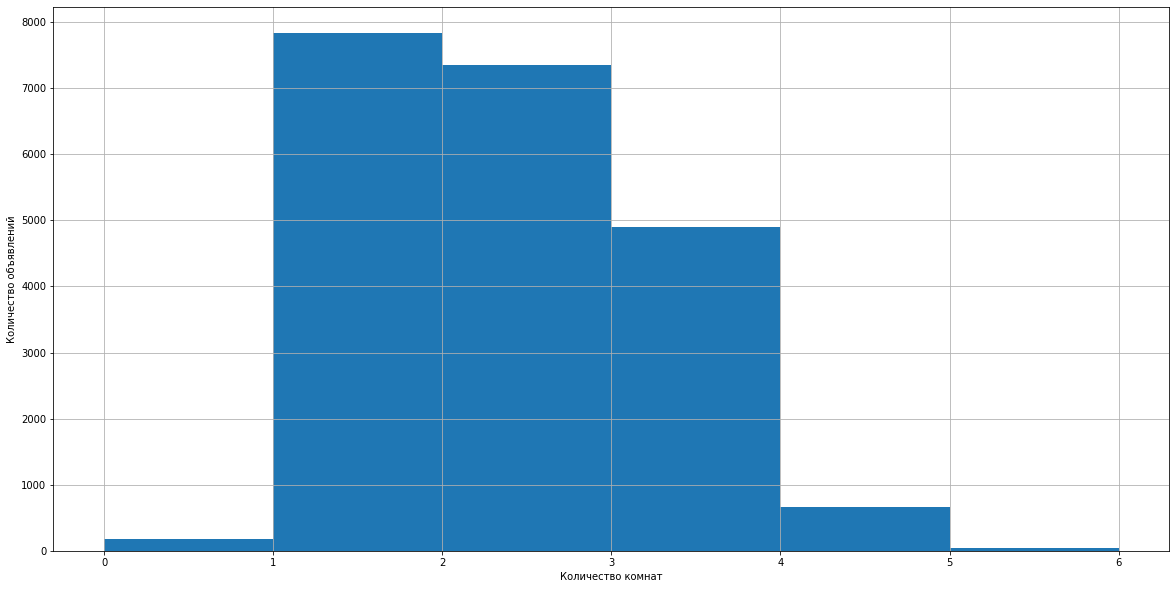

In [276]:
data_filtered['rooms'].hist(figsize=(20,10), bins=6)
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.show()

Подавляющее число объявлений содержат в себе отметки о наличии 1 или 2 комнат. Немного меньше, но заметное количество составляют объявления с 3 комнатами. Объявления с 0, 4, 5 и 6 комнатами встречаются намного реже.

##### Высота потолков

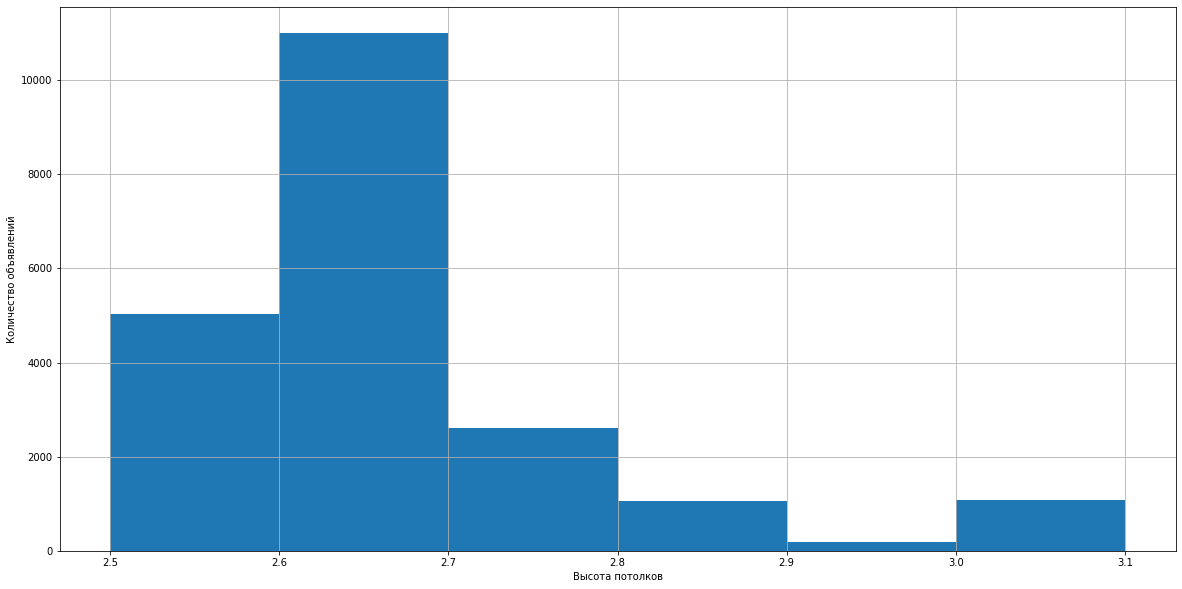

In [277]:
data_filtered['ceiling_height'].hist(figsize=(20,10), bins=6)
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")
plt.show()

Больше половины объявлений были выставлены по квартирам с высотой потолков 2,6 метра, четверть - с высотой 2,5 метра. В остальном графике выделяются квартиры с высотой потолков 3 метра.

##### Этаж квартиры

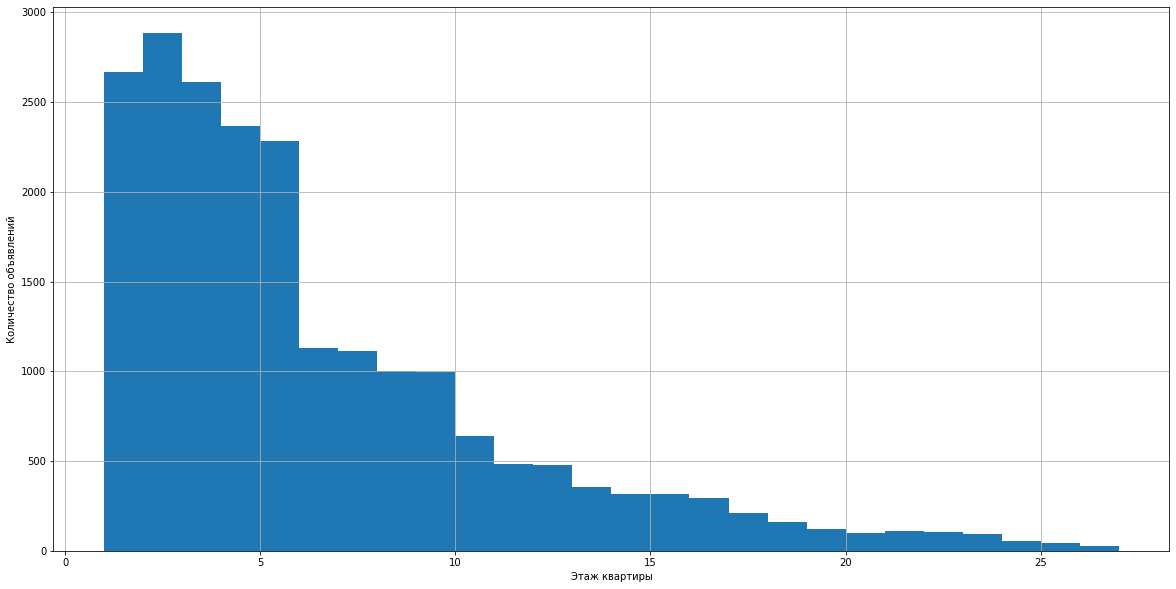

In [278]:
data_filtered['floor'].hist(figsize=(20,10), bins=26)
plt.xlabel("Этаж квартиры")
plt.ylabel("Количество объявлений")
plt.show()

Половина продаваемых квартир находится на первых 5 этажах, еще четверть - с 6 по 9. Начиная с 10 количество объявлений постепеннь снижается.

##### Тип этажа квартиры

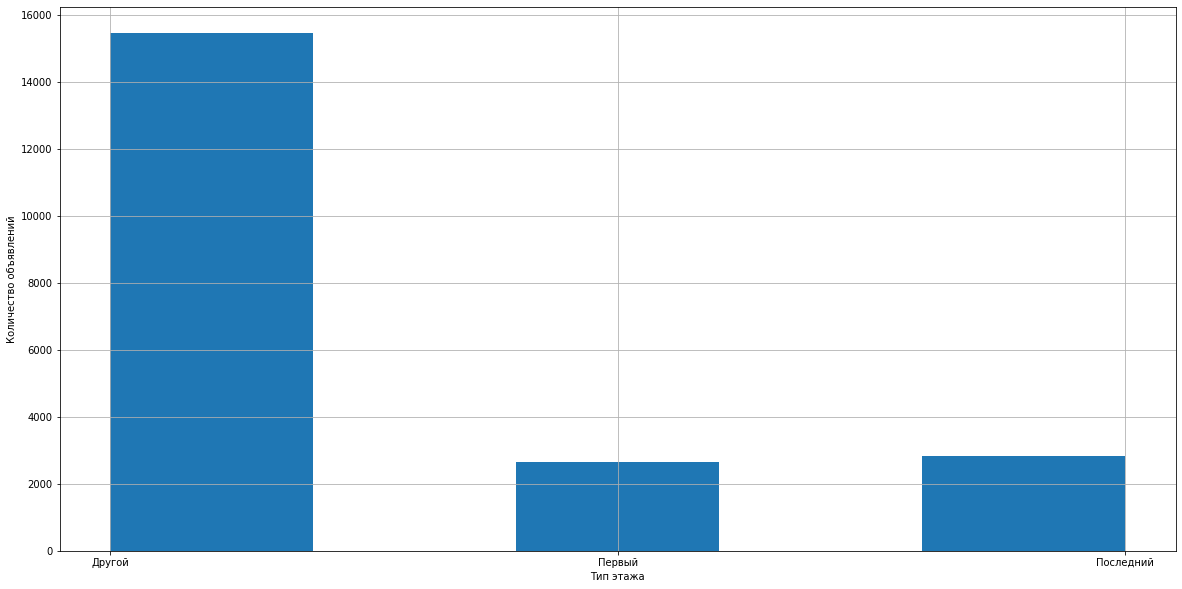

In [279]:
data_filtered['floor_category'].hist(figsize=(20,10), bins=5)
plt.xlabel("Тип этажа")
plt.ylabel("Количество объявлений")
plt.show()

Подавляющее большинство квартир продается ни на первом, ни на последнем этаже. Доля квартир на первом и последнем этажах практически равная.

##### Общее количество этажей в доме

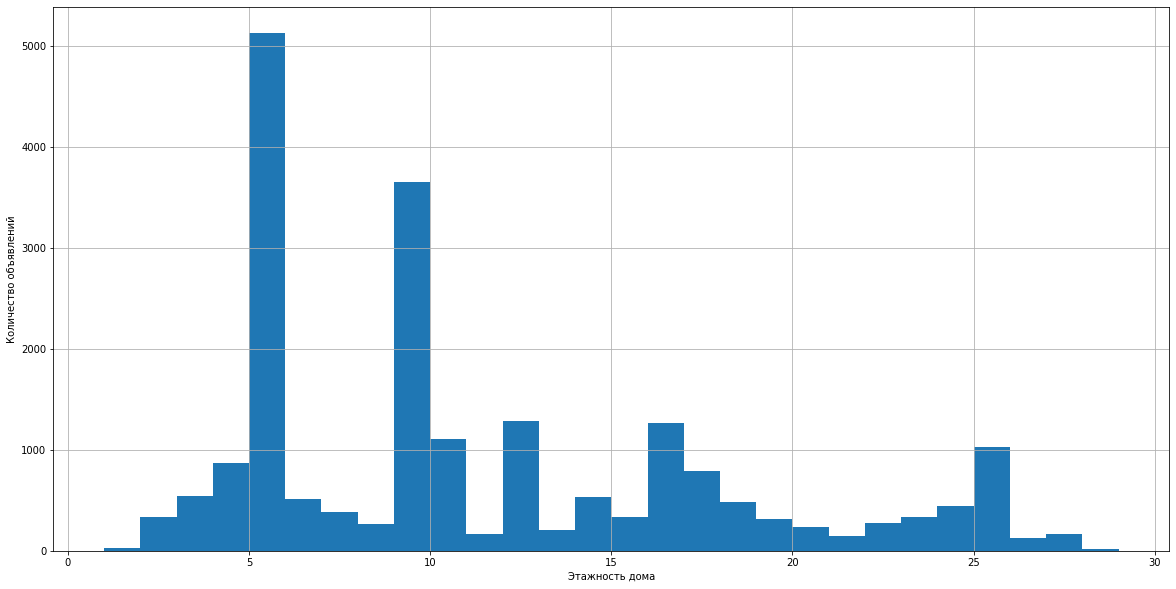

In [280]:
data_filtered['floors_total'].hist(figsize=(20,10), bins=28)
plt.xlabel("Этажность дома")
plt.ylabel("Количество объявлений")
plt.show()

Большинство домов в объявлениях - 5-ти и 9-ти этажные. На остальном графике по количеству можно выделить 4-ех, 10-ти, 12-ти, 16-ти и 25-ти этажные дома, остадьных заметно меньше.

##### Расстояние до центра города в метрах

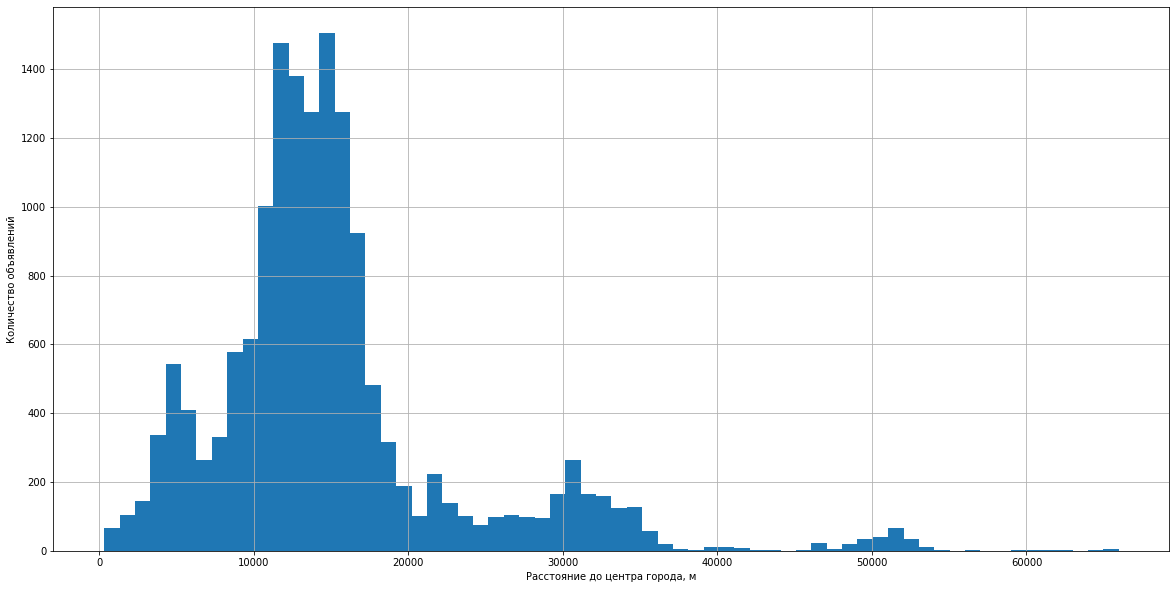

count    15630.000000
mean     15106.708125
std       8341.289249
min        329.000000
25%      10866.000000
50%      13696.000000
75%      16685.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [281]:
data_filtered['cityCenters_nearest'].hist(figsize=(20,10), bins=66)
plt.xlabel("Расстояние до центра города, м")
plt.ylabel("Количество объявлений")
plt.show()
data_filtered['cityCenters_nearest'].describe()

Около половины квартир, где указан параметр расстояния до центра города, расположены в промежутке от 10 до 16 км. Видны небольшие всплески в районе 5, 21 и 30 км. Также, небольшой, но выделяющийся всплеск в районе 50 км.

##### Расстояние до ближайшего аэропорта

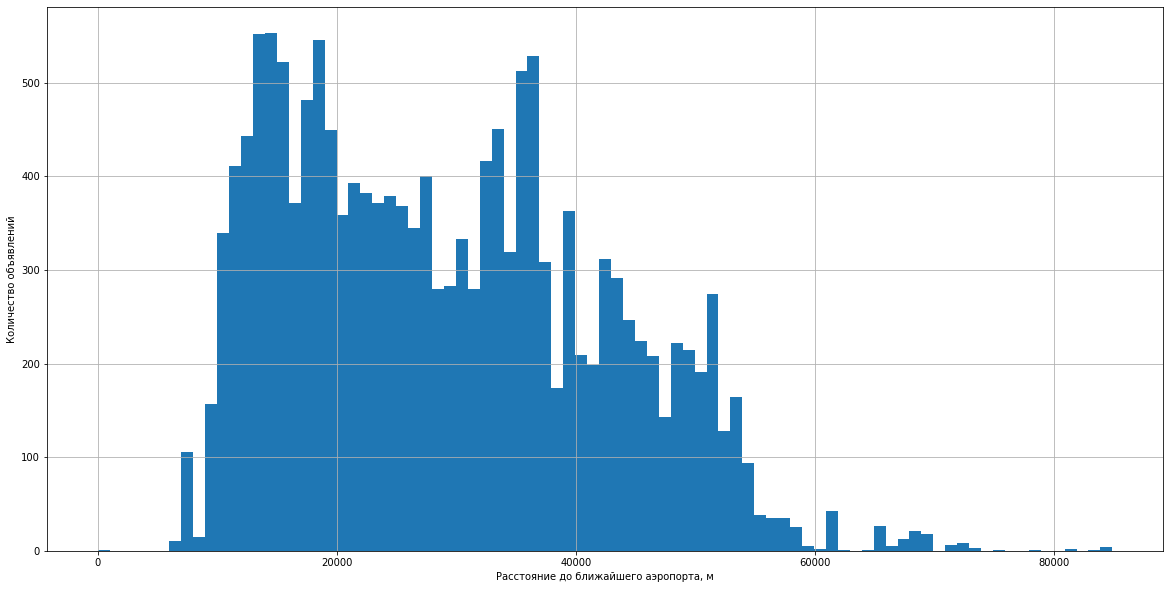

count    15615.000000
mean     29075.599808
std      13067.372208
min          0.000000
25%      17863.000000
50%      27650.000000
75%      38171.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [282]:
data_filtered['airports_nearest'].hist(figsize=(20,10), bins=85)
plt.xlabel("Расстояние до ближайшего аэропорта, м")
plt.ylabel("Количество объявлений")
plt.show()
data_filtered['airports_nearest'].describe()

На графике виден первый пик в районе 15 км., после чего он в целом постепенно спадает к значению в 60 км. с резкими выбросами в районе 18, 33, 36, 39, 42 и 50 км.

##### Расстояние до ближайшего парка

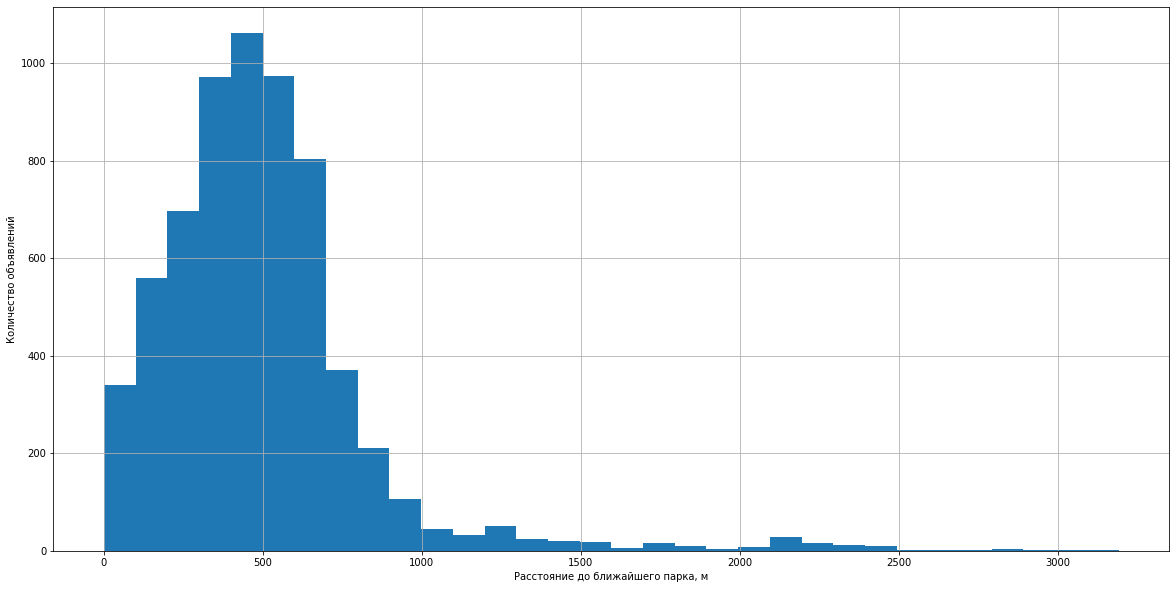

count    6406.000000
mean      498.590384
std       339.592757
min         1.000000
25%       300.000000
50%       460.000000
75%       620.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [283]:
data_filtered['parks_nearest'].hist(figsize=(20,10), bins=32)
plt.xlabel("Расстояние до ближайшего парка, м")
plt.ylabel("Количество объявлений")
plt.show()
data_filtered['parks_nearest'].describe()

Количество объявлений, где этот параметр указан в принципе небольшое, всего треть выборки. Большинство квартир, где этот параметр отмечен, находятся на расстоянии в 700 метров от ближайшего парка.

##### День публикации объявления

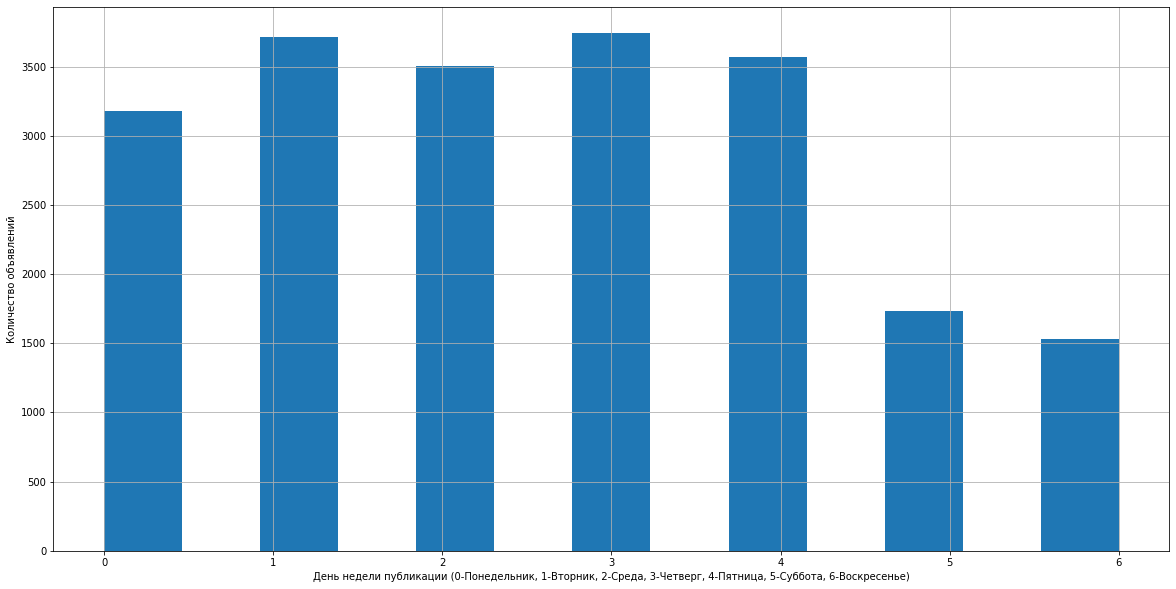

In [284]:
data_filtered['weekday_exposition'].hist(figsize=(20,10), bins=13)
plt.xlabel("День недели публикации (0-Понедельник, 1-Вторник, 2-Среда, 3-Четверг, 4-Пятница, 5-Суббота, 6-Воскресенье)")
plt.ylabel("Количество объявлений")
plt.show()

Чаще всего продавцы выставляют объявления в рабочие дни недели, причем практически без предпочтений (немного реже в понедельник). На выходных активность ниже в два раза по сравнению с остальными днями.

##### Месяц публикации объявления

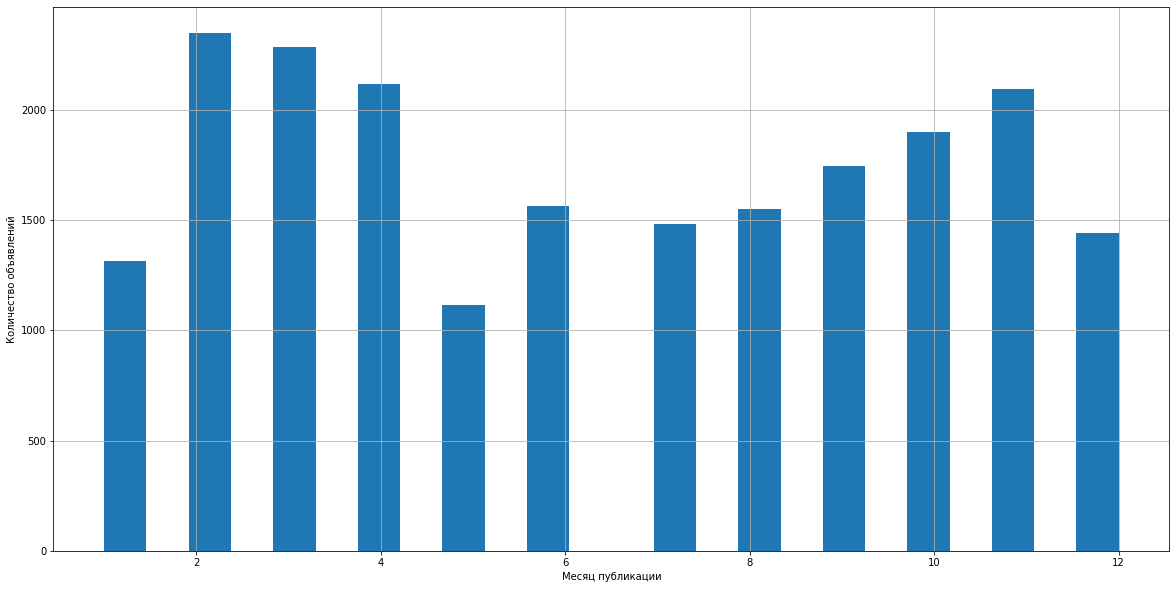

In [285]:
data_filtered['month_exposition'].hist(figsize=(20,10), bins=24)
plt.xlabel("Месяц публикации")
plt.ylabel("Количество объявлений")
plt.show()

Больше всего объявлений подано в феврале-апреле и осенние месяцы. Меньше всего - в "праздничные" январь и май. В летние месяцы активность равномерная, но с наступлением осени вырастает к ноябрю. Абсолютный максимум - в феврале, после него активность немного спадает, чтобы провалиться в мае.

#### Как быстро продавались квартиры?

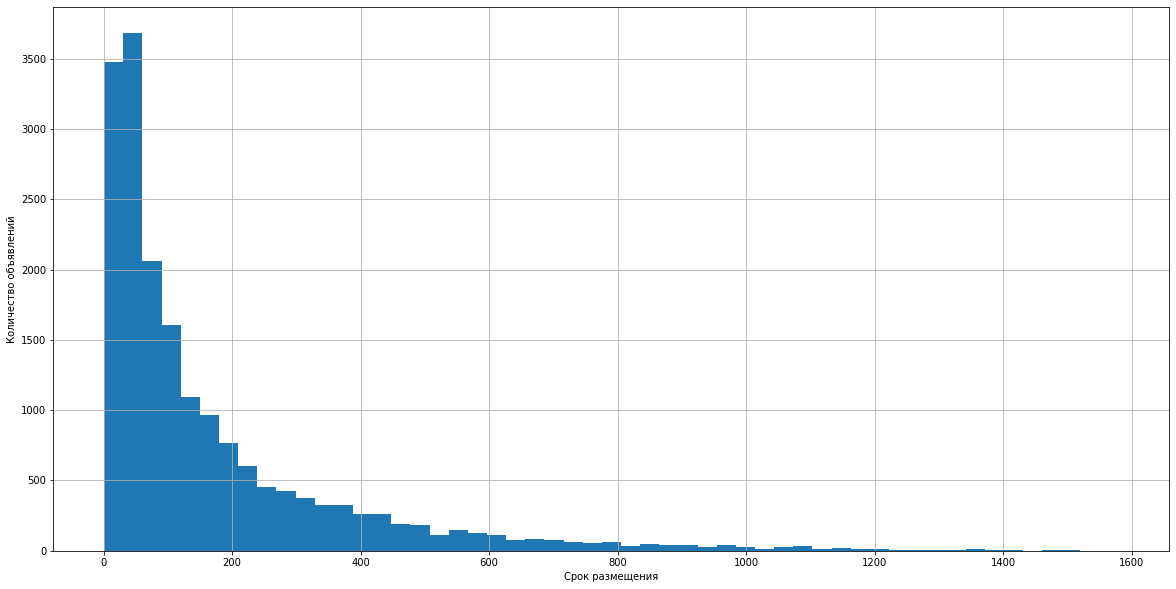

count    18427.000000
mean       171.683128
std        210.251452
min          1.000000
25%         44.000000
50%         90.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [286]:
data_filtered.query('days_exposition > 0')['days_exposition'].hist(figsize=(20,10), bins=53)
plt.xlabel("Срок размещения")
plt.ylabel("Количество объявлений")
plt.show()
data_filtered.query('days_exposition > 0')['days_exposition'].describe()

По графику видно, что большинство объектов продается в первые два месяца после публикации. Причем в первый и второй месяц продается практически поровну.

Среднее и медиана довольно сильно отличаются за счет "хвоста" из объектов с большим сроком размещения, поэтому за "стандартный" срок продажи адекватно взять медиану - 90 дней.

В целом, как мне кажется, быстрой можно продажу со сроком менее 44 дней (первый квартиль), а долгой - 217 дней (третий квартиль).

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Общая площадь

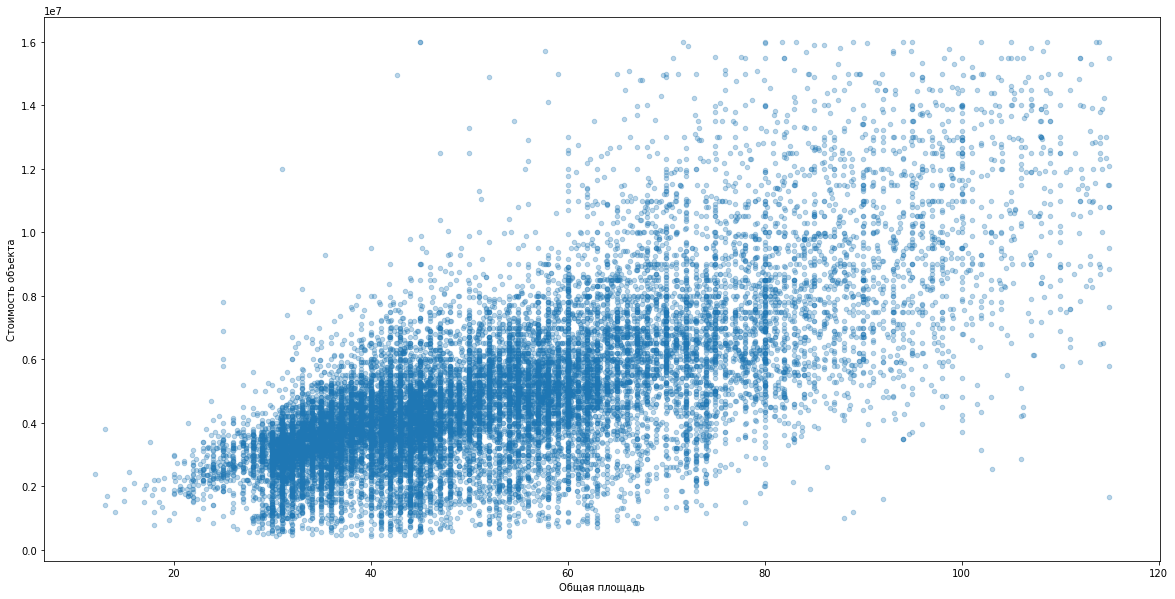

0.7131587347444811

In [287]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter', figsize=(20,10), alpha=0.3)
plt.xlabel("Общая площадь")
plt.ylabel("Стоимость объекта")
plt.show()
data_filtered['total_area'].corr(data_filtered['last_price'])

По графику видно, что при значениях общей площади до 60 кв. метров, группа объектов довольно плотная, с тенденцией к увеличению. После 60 кв. метров намного большей значений по стоимости выбивается из общей массы, но тенденция к увеличению все равно остается.

Коэффициент корреляции довольно высокий - общая площадь сильно влияет на стоимость объекта.

##### Жилая площадь

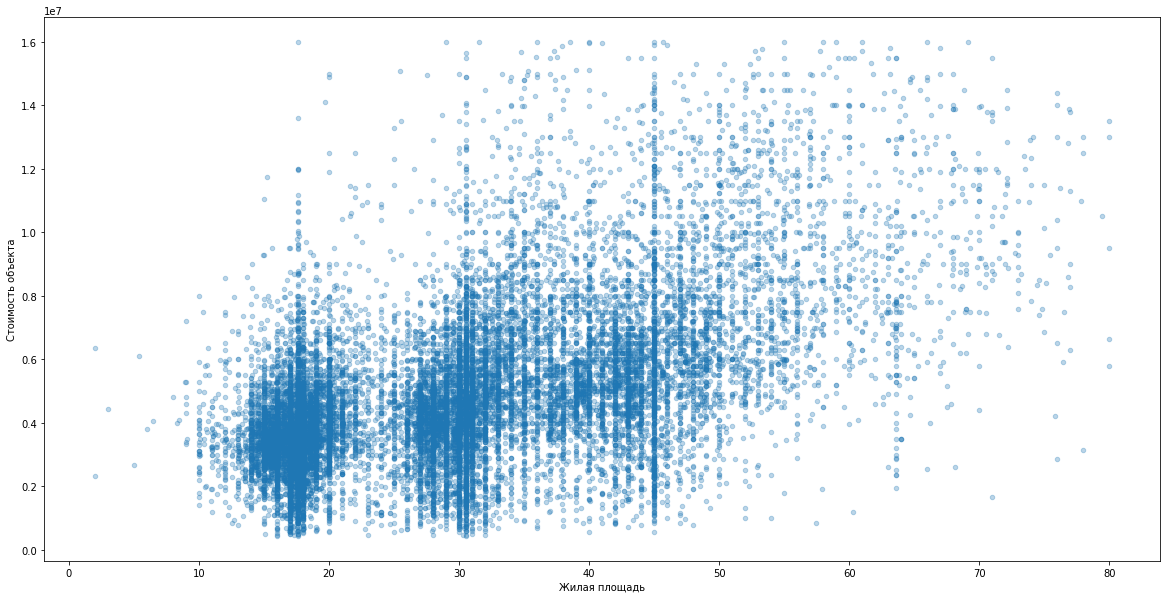

0.5596612097148191

In [288]:
data_filtered.plot(x='living_area', y='last_price', kind='scatter', figsize=(20,10), alpha=0.3)
plt.xlabel("Жилая площадь")
plt.ylabel("Стоимость объекта")
plt.show()
data_filtered['living_area'].corr(data_filtered['last_price'])

На графике заметна "расческа" - при одих и тех же значениях жилой площади много совершенно разных значений стоимости. Но в среднем тенденция к увеличению стоимости при увеличении жилой площади есть.

Коэффициент корреляции заметно ниже коэффициента для общей площади, влияние этого фактора меньше.

##### Площадь кухни

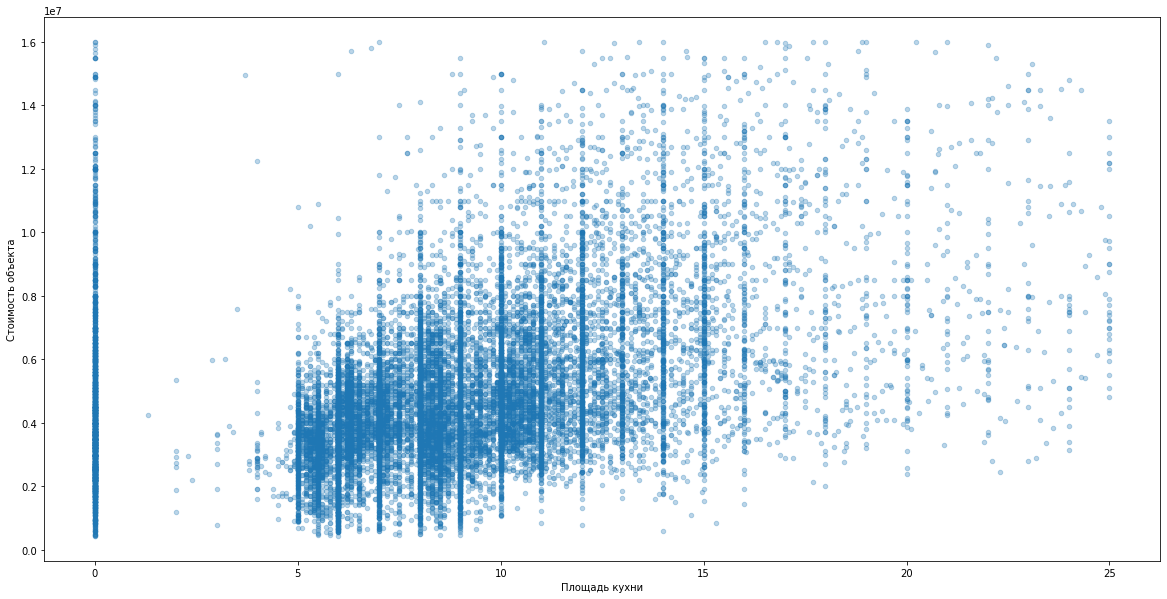

0.4056867803867769

In [289]:
data_filtered.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(20,10), alpha=0.3)
plt.xlabel("Площадь кухни")
plt.ylabel("Стоимость объекта")
plt.show()
data_filtered['kitchen_area'].corr(data_filtered['last_price'])

Несмотря на "расческу", пятно распределения довольно плотное, заметно рассеивающееся после значения площади кухни в 13 кв. метров. Квартир без кухонь в выборке довольно много и они выставлены по всему разбросу стоимости, пусть и с тяготением к нижней части этого разброса.

С учетом квартир без кухонь, коэффициент коррекляции довольно низкий. Попробуем эти квартиры отбросить.

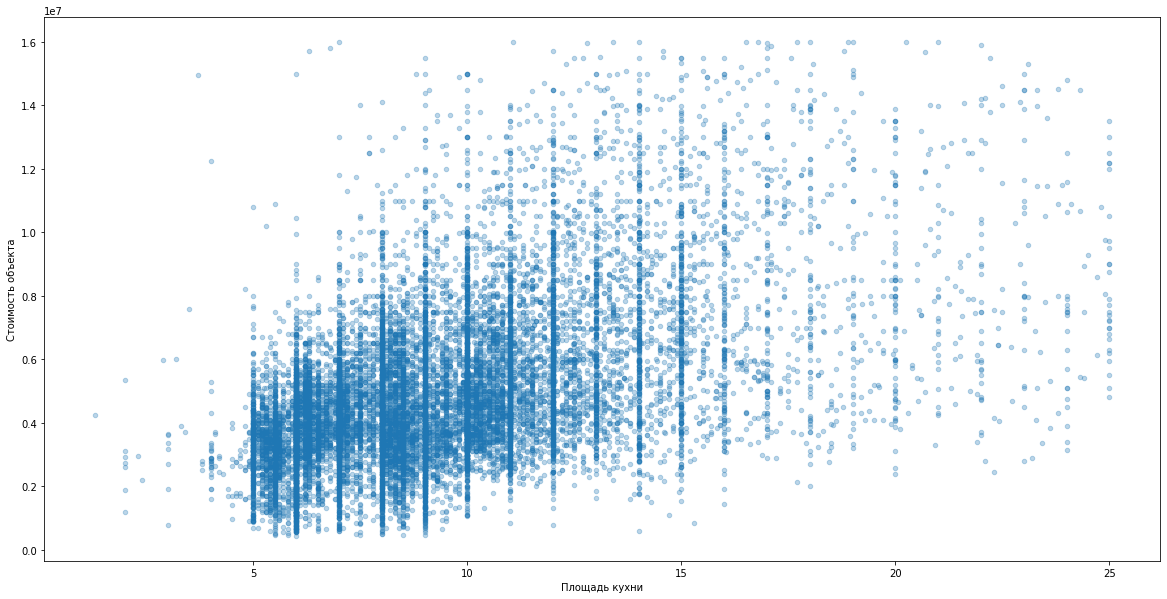

0.5196954887666885

In [290]:
data_filtered.query('kitchen_area > 0').plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(20,10), alpha=0.3)
plt.xlabel("Площадь кухни")
plt.ylabel("Стоимость объекта")
plt.show()
data_filtered.query('kitchen_area > 0')['kitchen_area'].corr(data_filtered['last_price'])

Коэффициент почти такой же, как и у показателя жилой площади. При наличии кухни, ее площадь определенно влияет на стоимость объекта.

##### Количество комнат

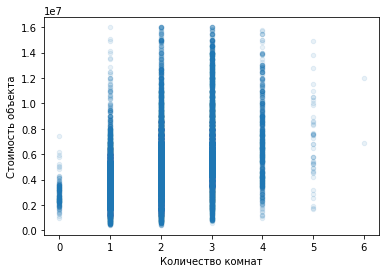

0.42820284745885073

In [291]:
data_filtered.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1)
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость объекта")
plt.show()
data_filtered['rooms'].corr(data_filtered['last_price'])

Такой график плохо показывает зависимость - почти по всем значениям количества комнат большое количество значений стоимости. Судя по коэффициенту корреляции, определенная зависимость все таки есть. Попробуем сравнить среднюю цену по квартирам с разным количеством комнат.

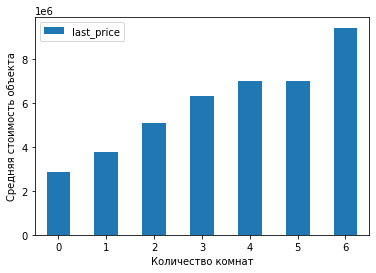

In [292]:
data_filtered.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')
plt.xlabel("Количество комнат")
plt.ylabel("Средняя стоимость объекта")
plt.xticks(rotation = 0)
plt.show()

Стало видно, что средняя цена явно зависит от количества комнат. Исключение - 5-ти комнатные квартиры, их средняя цена мало отличается от 4-ех комнатных.

##### Этаж, на котором расположена квартира (первый, последний, другой)

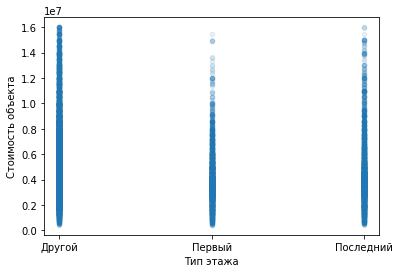

In [293]:
data_filtered.plot(x='floor_category', y='last_price', kind='scatter', alpha=0.1)
plt.xlabel("Тип этажа")
plt.ylabel("Стоимость объекта")
plt.show()

И снова такой тип графика мало репрезентативен. Обратимся к средним значениям.

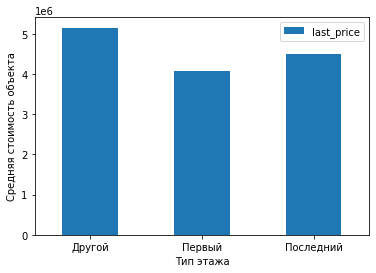

In [294]:
data_filtered.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')
plt.xlabel("Тип этажа")
plt.ylabel("Средняя стоимость объекта")
plt.xticks(rotation = 0)
plt.show()

В среднем квартиры, расположенные на любых, кроме первого и последнего, этажах, стоят дороже. Квартиры на первом этаже дешевле остальных. Учитывая разницу между этими двумя средними в 1 миллион рублей, определенная корреляция есть.

##### Дата размещения (день недели)

Как и в двух предыдущих случаях, диаграмма рассеивания не будет репрезентативна, перейдем сразу к среднему.

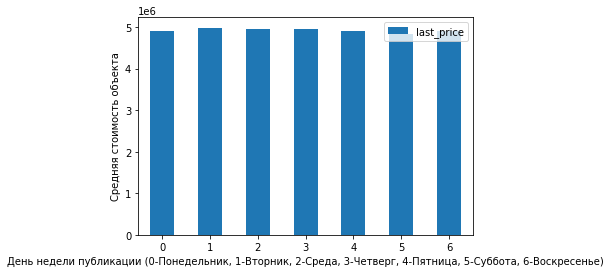

-0.009657914919238019

In [295]:
data_filtered.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')
plt.xticks(rotation = 0)
plt.xlabel("День недели публикации (0-Понедельник, 1-Вторник, 2-Среда, 3-Четверг, 4-Пятница, 5-Суббота, 6-Воскресенье)")
plt.ylabel("Средняя стоимость объекта")
plt.show()
data_filtered['weekday_exposition'].corr(data_filtered['last_price'])

Разницы по среднему практически нет, зависимости не видно. Это подтверждается очень низким коэффициентом корреляции.

##### Дата размещения (месяц)

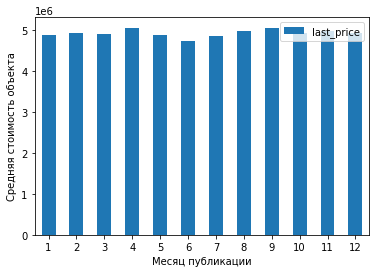

0.006430480122188421

In [296]:
data_filtered.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')
plt.xlabel("Месяц публикации")
plt.ylabel("Средняя стоимость объекта")
plt.xticks(rotation = 0)
plt.show()
data_filtered['month_exposition'].corr(data_filtered['last_price'])

Как и по предыдущему показателю, зависимости нет.

##### Дата размещения (год)

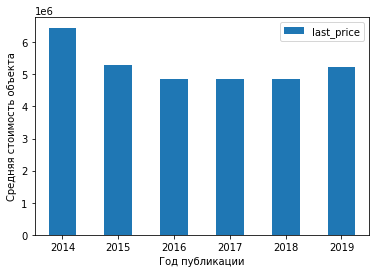

0.0009862599840740796

In [297]:
data_filtered.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')
plt.xlabel("Год публикации")
plt.ylabel("Средняя стоимость объекта")
plt.xticks(rotation = 0)
plt.show()
data_filtered['year_exposition'].corr(data_filtered['last_price'])

Видно, что средняя цена квартиры в 2014 году была выше на 1 миллион рублей по сравнению с остальными периодами, но в целом зависимости нет.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

,adv_count,sq_meter_price
locality_name,,
Санкт-Петербург,"13,338","107,271"
Мурино,582,"86,015"
Кудрово,462,"95,318"
посёлок Шушары,432,"78,644"
Всеволожск,387,"67,049"
Колпино,326,"75,544"
Пушкин,325,"101,105"
посёлок Парголово,325,"90,362"
Гатчина,299,"68,836"


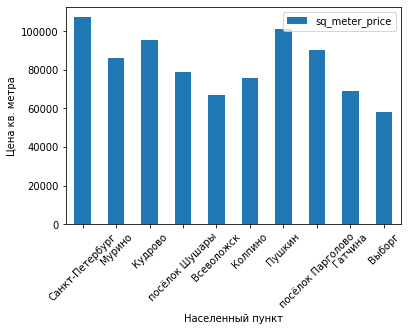

In [298]:
#для удобства выделим данные в отдельную переменную
top_locality = data_filtered.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean'])
#переименуем столбцы, чтобы избавиться от мультииндекса
top_locality.columns = ['adv_count', 'sq_meter_price']
display(top_locality.sort_values(by='adv_count', ascending=False).head(10).style.format("{:,.0f}"))
top_locality.sort_values(by='adv_count', ascending=False).head(10).plot(y='sq_meter_price', kind='bar')
plt.xlabel("Населенный пункт")
plt.ylabel("Цена кв. метра")
plt.xticks(rotation = 45)
plt.show()

Среди 10 населенных пунктов с самым большим количеством объявлений самая высокая цена кв. метра в Санкт-Петербурге (107271 руб.), а самая низкая в Выборге (57950 руб.).

#### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города

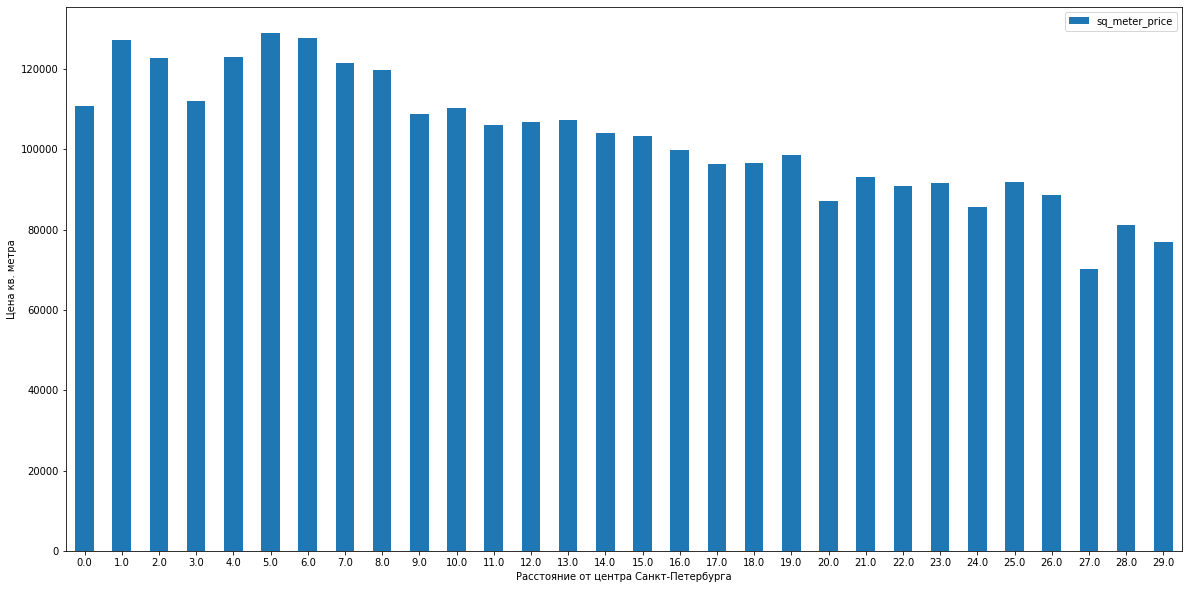

In [299]:
#выделим квартиры в Санкт-Петербурге в отдельную переменную
spb_locality = data_filtered.query('locality_name == "Санкт-Петербург"')
spb_locality.pivot_table(index='city_centers_km', values='sq_meter_price', aggfunc='mean').plot(y='sq_meter_price', kind='bar', figsize=(20,10))
plt.xlabel("Расстояние от центра Санкт-Петербурга")
plt.ylabel("Цена кв. метра")
plt.xticks(rotation = 0)
plt.show()

Видно, что в целом есть тенденция по снижению стоимости квадратного метра жилья по мере удаления от центра города. Из нее выбиваются квартиры в самом центре города и на расстоянии 3 километров - у них стоимость "квадрата" заметно дешевле.

### Общий вывод

Большая часть проданных квартир имела общую площадь от 30 до 60 кв. метров.

Чаще остальных встречаются квартиры с жилой площадью от 15 до 20 и от 27 до 31 кв. метра.

В значительном количестве объявлений нет указания о наличии кухни, но где она есть, чаще всего встречается метраж от 5 до 12 кв. метров.

Больше половины объявлений выставлены с ценой квартиры от 2,5 до 5,5 млн. рублей.

Подавляющее большинство квартир имеют 1, 2 и 3 комнаты и высоту потолков от 2,5 до 2,7 метра.

Половина продаваемых квартир находится на первых 5 этажах, еще четверть - с 6 по 9.

Подавляющее большинство квартир продается ни на первом, ни на последнем этаже.

Большинство домов в объявлениях - 5-ти и 9-ти этажные.

Чаще всего продавцы выставляют объявления в рабочие дни недели.

Больше всего объявлений подано в феврале-апреле и осенние месяцы. Меньше всего - в "праздничные" январь и май.

Большинство объектов продается в первые два месяца после публикации, в среднем, объекты продаются за 90 дней.

Больше всего на цену квартиры влияют общая площадь, жилая площадь и количество комнат.

День недели и месяц размещения на цену не влияют.

Средняя цена квартиры в 2014 году была выше на 1 миллион рублей по сравнению с остальными периодами.

Среди 10 населенных пунктов с самым большим количеством объявлений самая высокая цена кв. метра в Санкт-Петербурге (107270,79 руб.), а самая низкая в Выборге (57949,89 руб.).

В самом Санкт-Петербурге есть тенденция по снижению стоимости квадратного метра жилья по мере удаления от центра города. Из нее выбиваются квартиры в самом центре города и на расстоянии 3 километров - у них стоимость "квадрата" заметно дешевле.